## Glaciers and Glacier Overdeepenings in High Mountain Asia

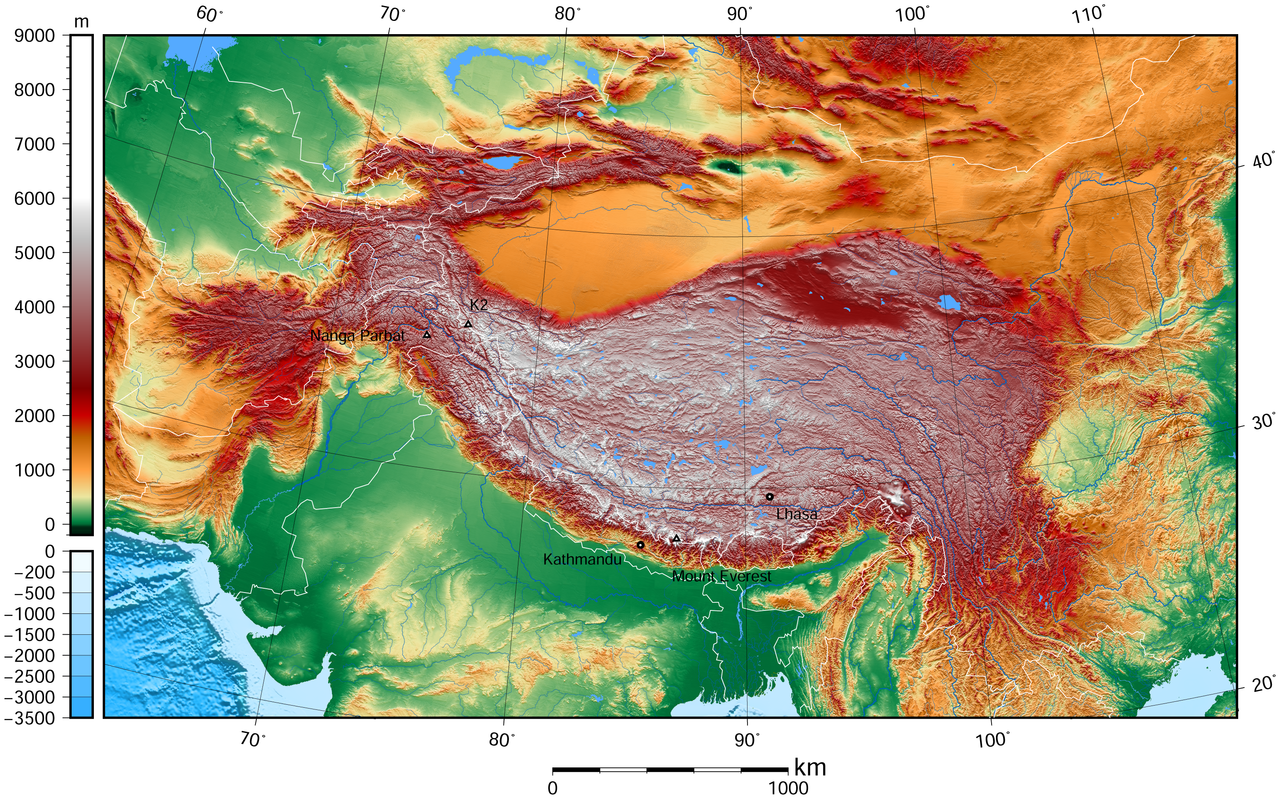

## ^Study Area
The study area is high mountain asia including the Himalayan Mountains.

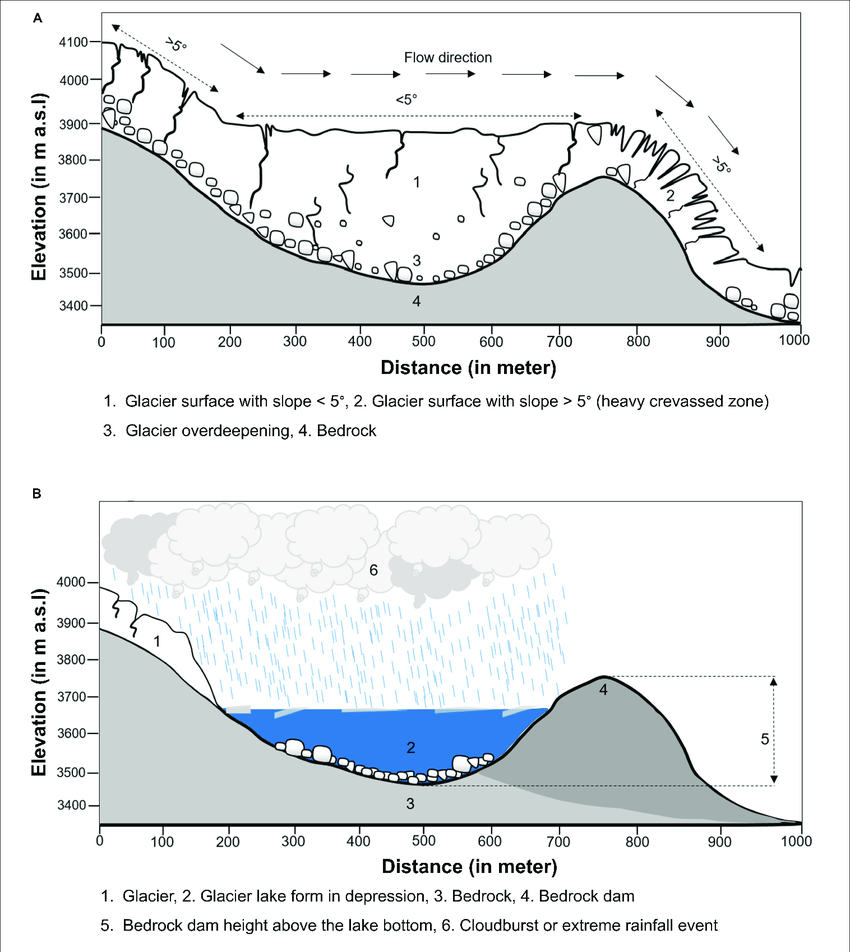

## ^How overdeepenings form
Glaciers weather and erode bedrock to create cavaties called overdeepenings. When glaciers retreat a glacial lake is left behind in the overdeepening.

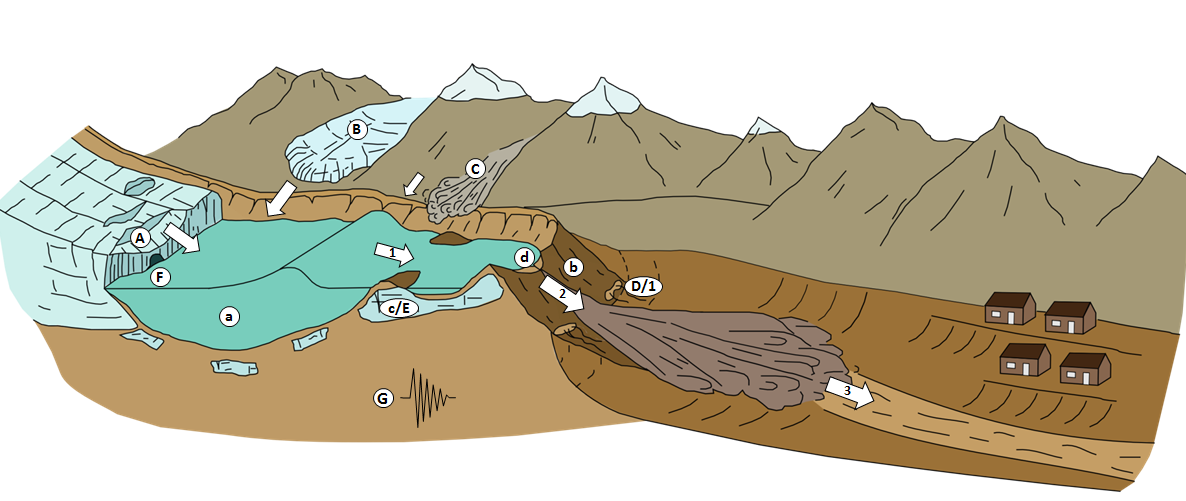

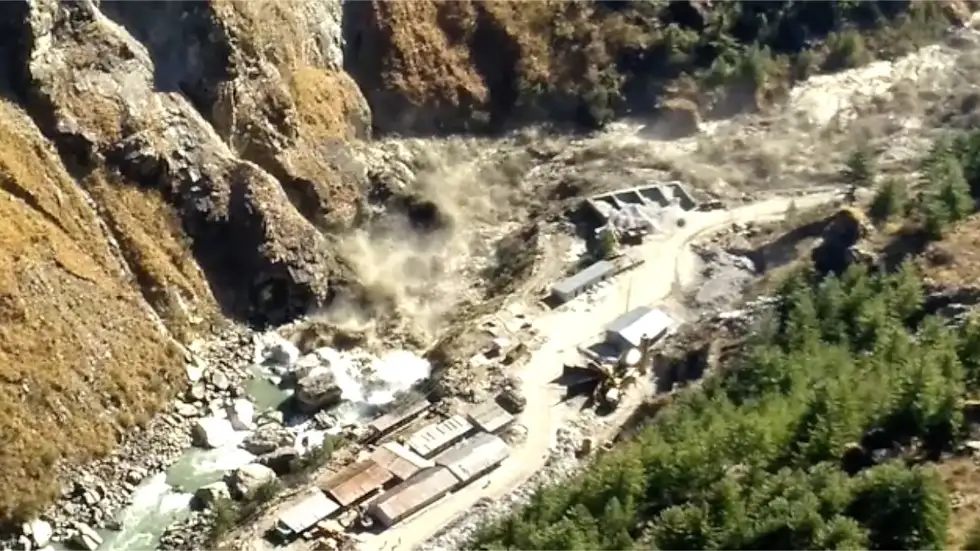

## ^Why they are important
Glacial lakes that form from overdeepenings overflow or burst creating massive flooding. This flooding can affect the subsequent villages in the path of the floodplain.

Flash flood from overdeepening burst in Uttarakhand, India (2021)

In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from functools import reduce

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import statsmodels.api as sm

%matplotlib inline
%config InlineBackend.figure_format = 'retina' 
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (12, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [2]:
# read in the data from Andy Margason's github page
url = 'https://raw.githubusercontent.com/amargason5/HMA-Glaciers-and-Overdeepenings-Project-/main/HMA_Glacier_Centroids.csv'

In [3]:
# read in the data using pandas
df = pd.read_csv(url, encoding = 'unicode_escape')
df

anlys_id         glac_id  ... OD_Large OD_All
0         113547  G079215E30793N  ...        0      0
1         113547  G079215E30793N  ...        0      0
2         113547  G079215E30793N  ...        0      0
3         113547  G079215E30793N  ...        0      0
4         112809  G079745E30770N  ...        0      0
...          ...             ...  ...      ...    ...
187413    491388  G075708E35873N  ...        1      1
187414    153841  G076367E35737N  ...        1      1
187415    494815  G076367E35737N  ...        1      1
187416    163138  G077129E35401N  ...        1      1
187417    497444  G077129E35401N  ...        1      1

[187418 rows x 14 columns]

## Plots of the data and locations of overdeepenings

Text(0.5, 1.0, 'Elevation of Glacier Centroids in HMA')

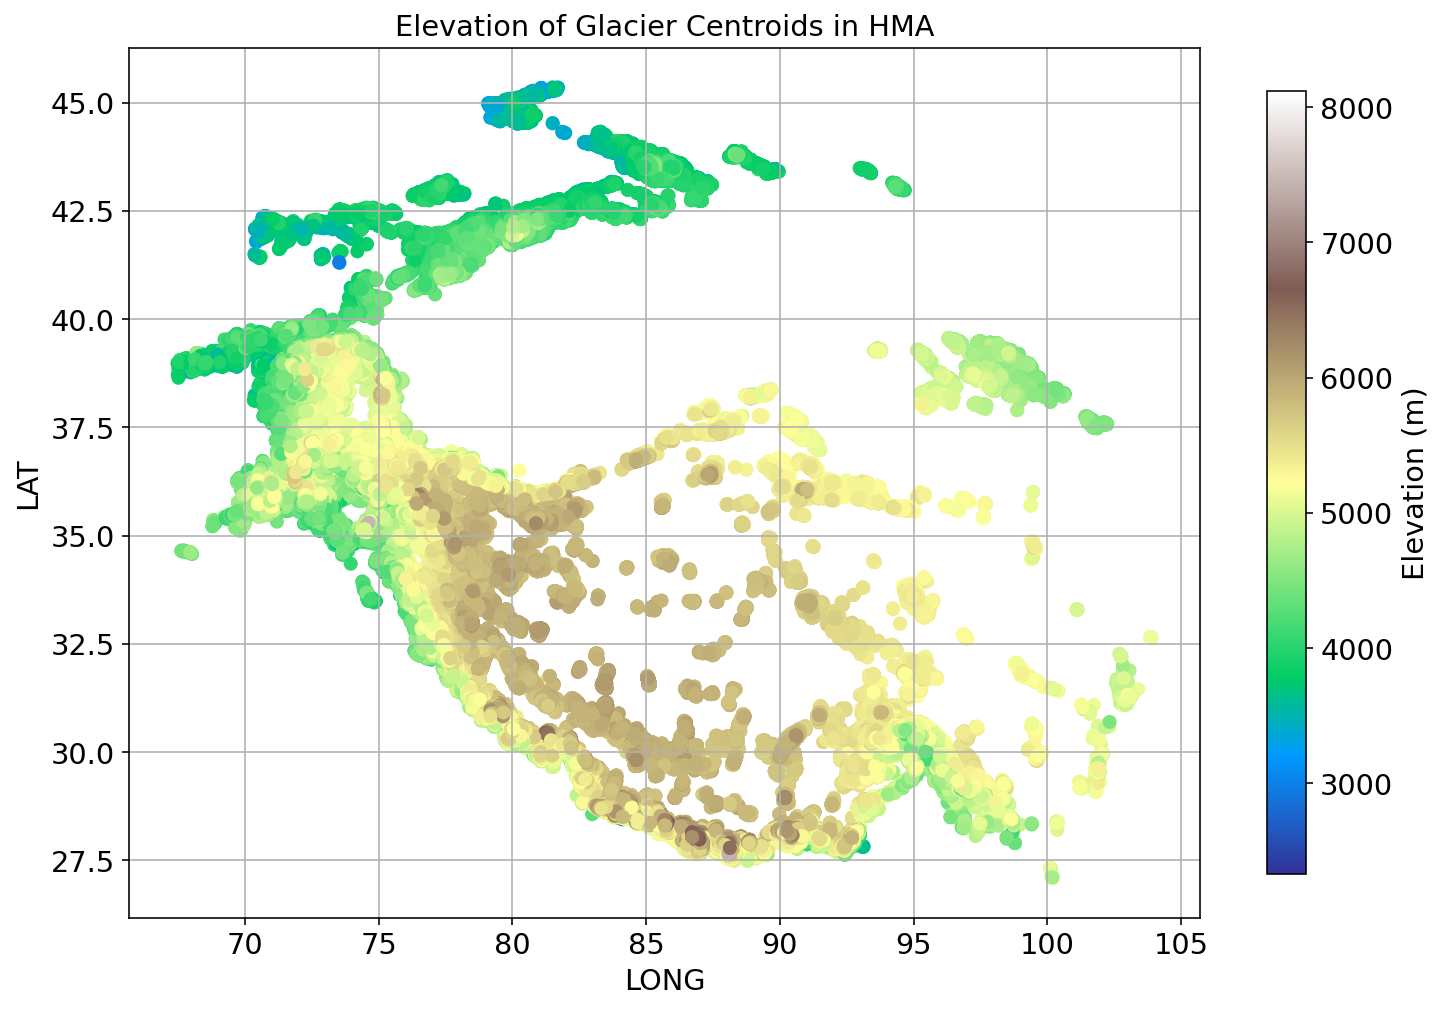

In [4]:
# plot the elevation relative to lat and long of all glacier centroids
fig, ax = plt.subplots(1,1, figsize=(12,8))

ax.grid()
cs = ax.scatter(df.LONG, df.LAT, cmap = 'terrain', c = df.mean_elev_m)

cb = fig.colorbar(cs,shrink=0.9)
cb.set_label('Elevation (m)')

ax.set_xlabel('LONG')
ax.set_ylabel('LAT')
ax.set_title('Elevation of Glacier Centroids in HMA')


Text(0.5, 1.0, 'Elevation of Glacier Centroids w/ All Overdeepenings')

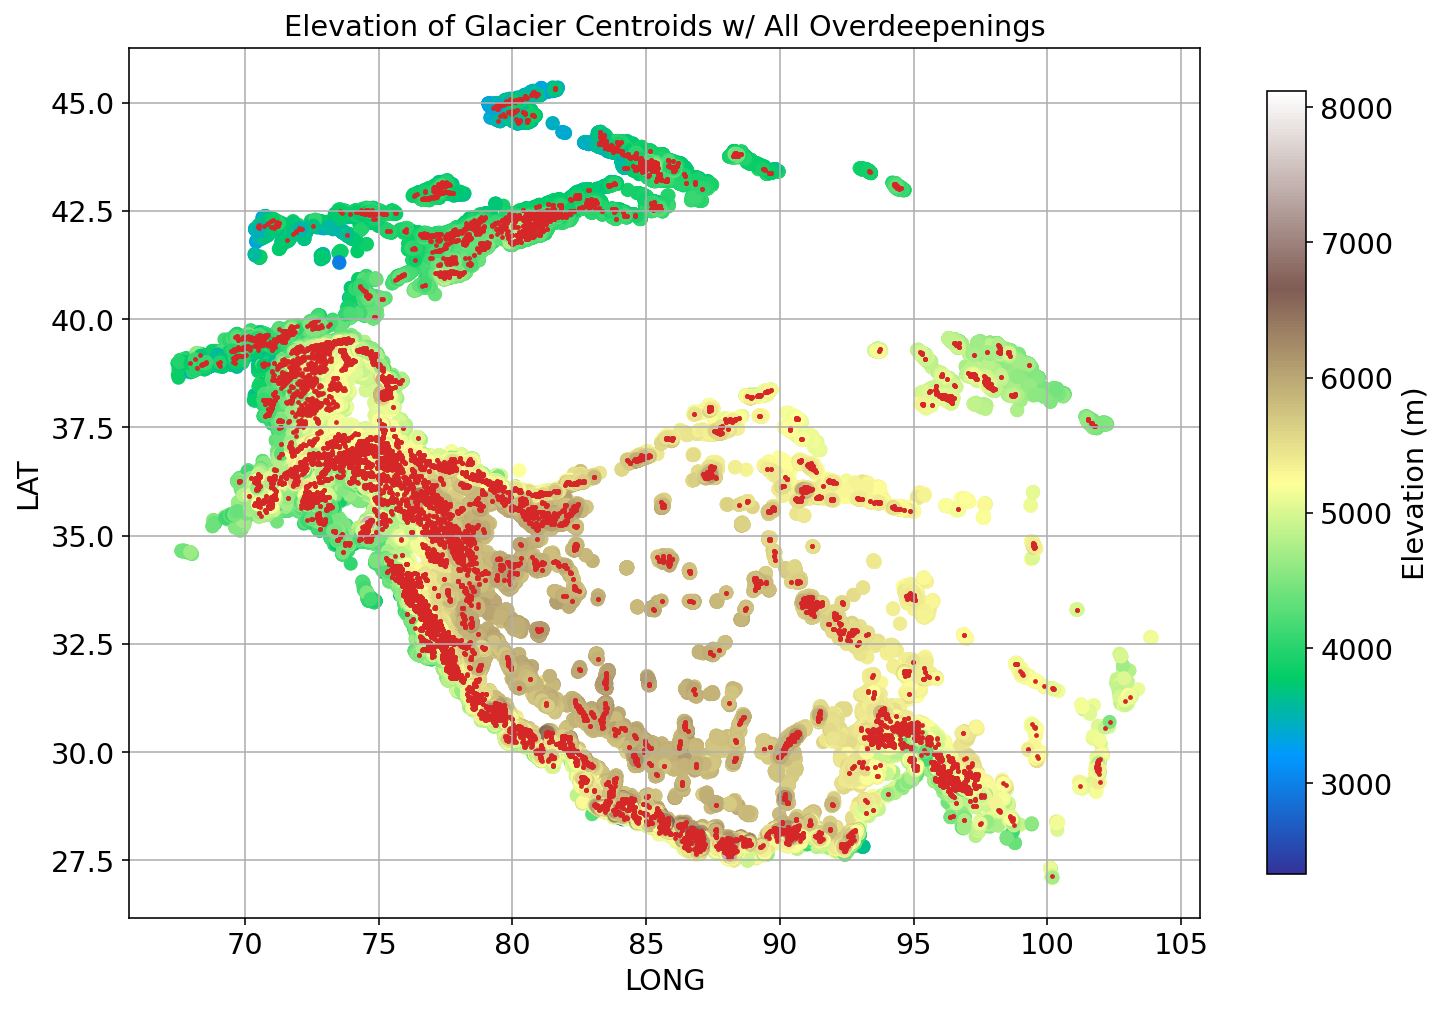

In [6]:
# There are two types of overdeepening data in the dataset
# OD_All represents all the overdeepenings calculated by Furian et al. 2021
# OD_Large is QC'd data that only contains large overdeepenings
# This is a Plot of elevation and all overdeepenings

fig, ax = plt.subplots(1,1, figsize=(12,8))

ax.grid()
cs = ax.scatter(df.LONG, df.LAT, cmap = 'terrain', c = df.mean_elev_m)
ax.scatter(df_od_all.LONG, df_od_all.LAT, cmap = 'terrain', c = 'tab:red', s = 2)

cb = fig.colorbar(cs,shrink=0.9)
cb.set_label('Elevation (m)')

ax.set_xlabel('LONG')
ax.set_ylabel('LAT')
ax.set_title('Elevation of Glacier Centroids w/ All Overdeepenings')


Text(0.5, 1.0, 'Elevation of Glacier Centroids w/ Large Overdeepenings')

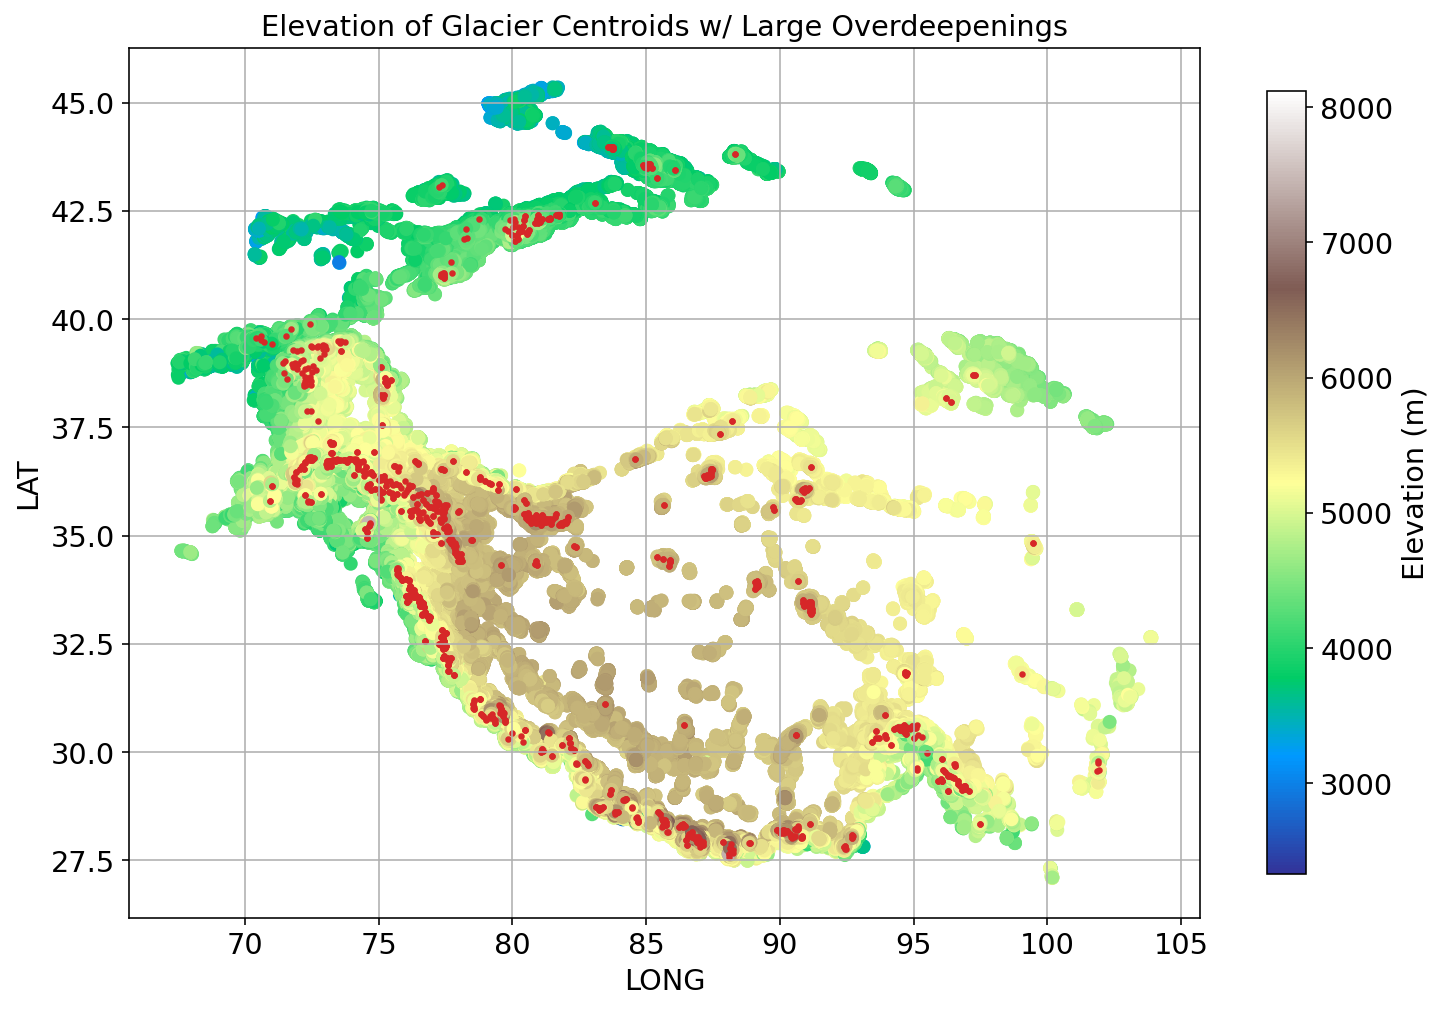

In [7]:
# Plot of elevation and large overdeepenings
fig, ax = plt.subplots(1,1, figsize=(12,8))

ax.grid()
cs = ax.scatter(df.LONG, df.LAT, cmap = 'terrain', c = df.mean_elev_m)
ax.scatter(df_od_large.LONG, df_od_large.LAT, cmap = 'terrain', c = 'tab:red', s = 5)

cb = fig.colorbar(cs,shrink=0.9)
cb.set_label('Elevation (m)')

ax.set_xlabel('LONG')
ax.set_ylabel('LAT')
ax.set_title('Elevation of Glacier Centroids w/ Large Overdeepenings')

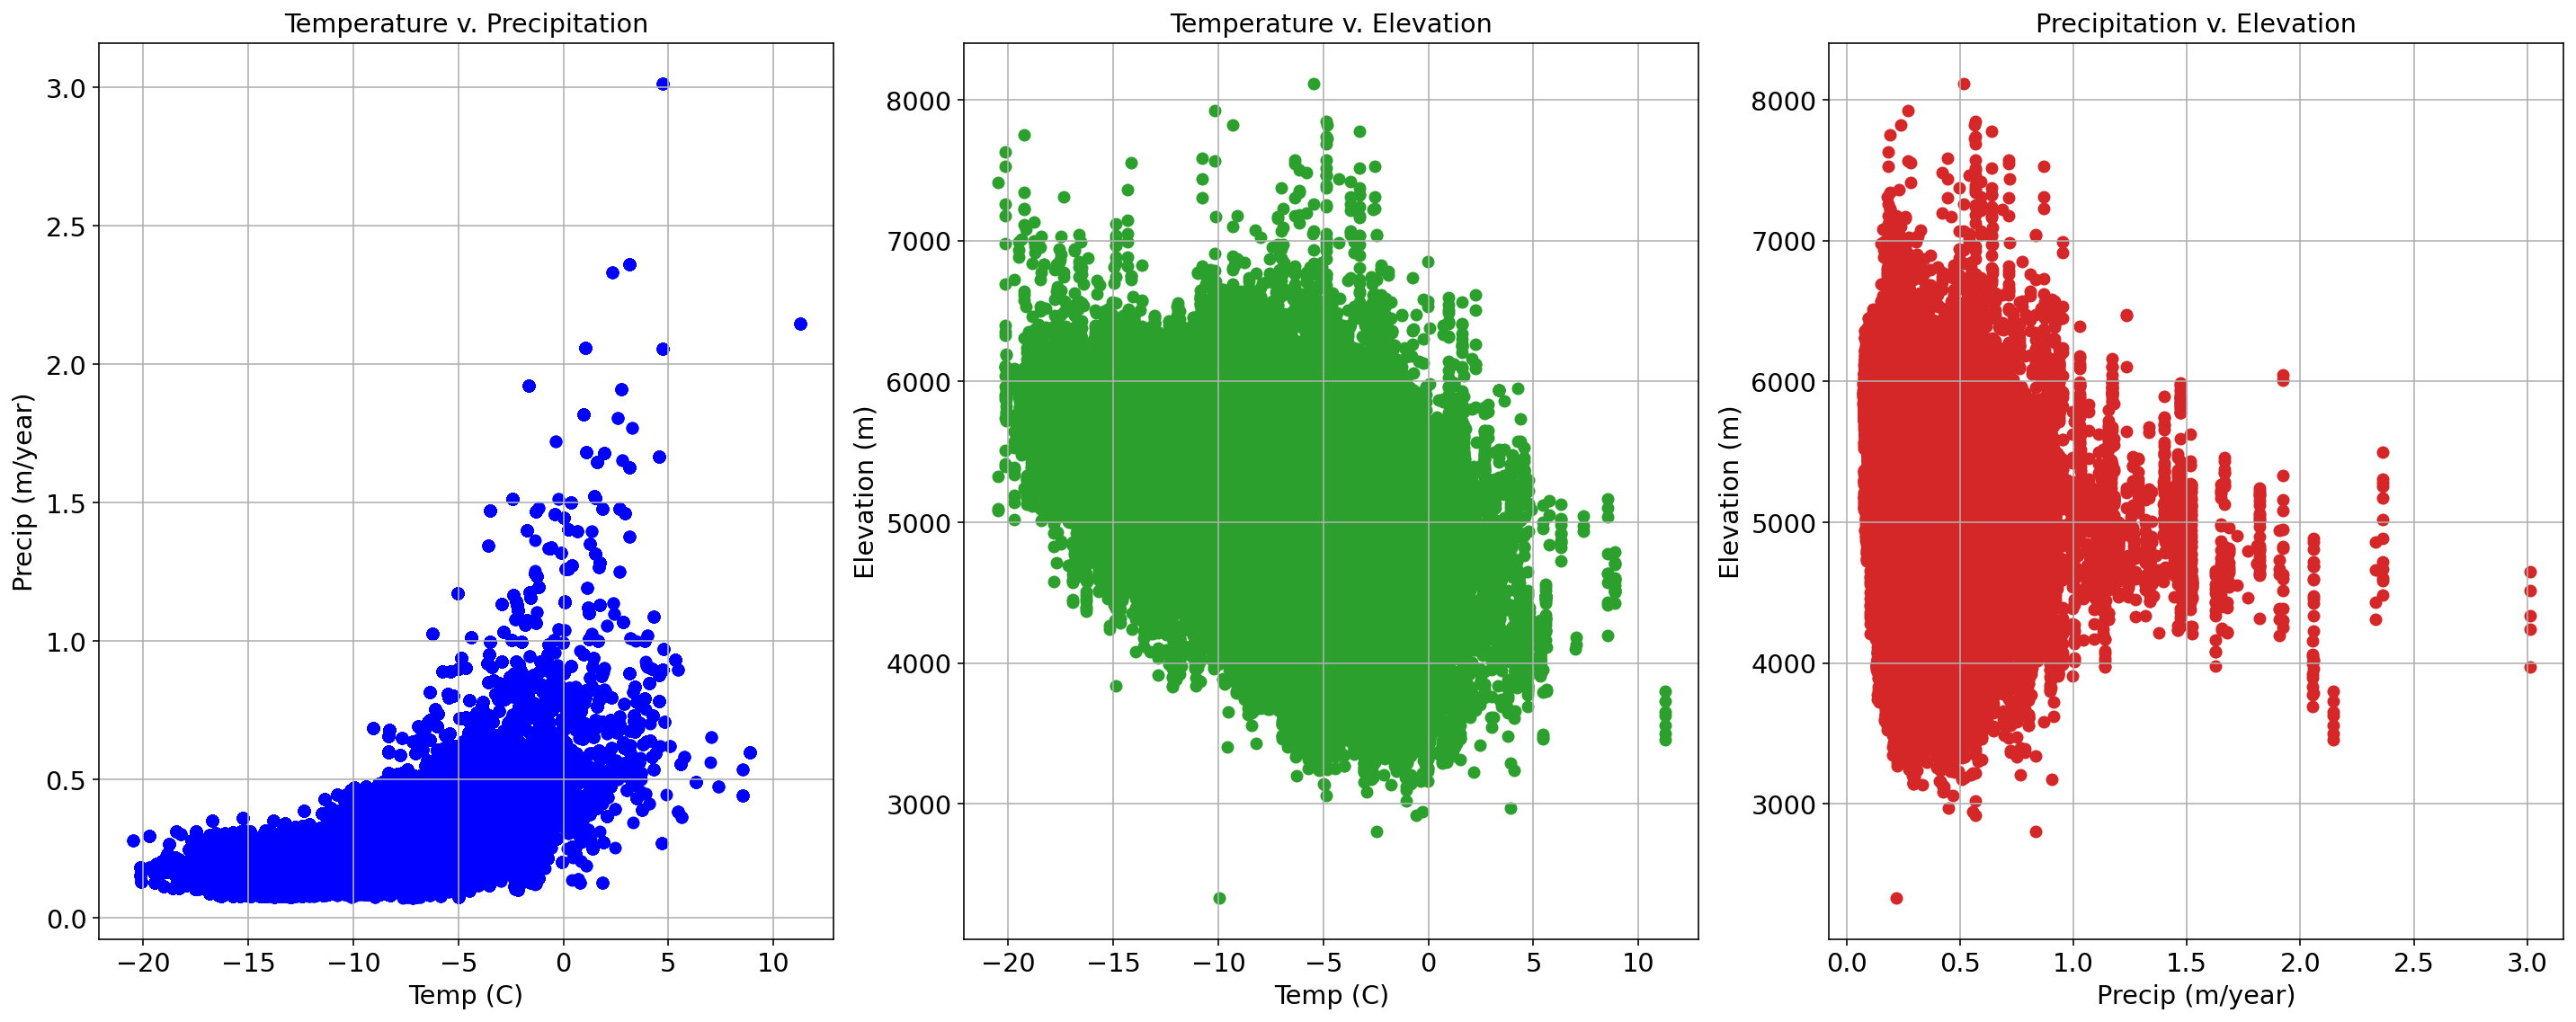

In [103]:
# Temperature v. Precipitation v. ELevation
fig,axes = plt.subplots(1,3, figsize=(20,8))

axes[0].scatter( df.era5_temp_c-273.15, df.era5_total_precip_mperyr, c = 'b')
axes[0].set_ylabel('Precip (m/year)')
axes[0].set_xlabel('Temp (C)')
axes[0].set_title('Temperature v. Precipitation')
axes[0].grid()

axes[1].scatter(df.era5_temp_c-273.15, df.mean_elev_m, c = 'tab:green')
axes[1].set_ylabel('Elevation (m)')
axes[1].set_xlabel('Temp (C)')
axes[1].set_title('Temperature v. Elevation')
axes[1].grid()

axes[2].scatter(df.era5_total_precip_mperyr, df.mean_elev_m, c = 'tab:red')
axes[2].set_ylabel('Elevation (m)')
axes[2].set_xlabel('Precip (m/year)')
axes[2].set_title('Precipitation v. Elevation')
axes[2].grid()

fig.tight_layout()


## Logistic Regression Model
Here we use the statistical logit model to predict the categorical dependent variable of the overdeepening column OD_All. 

In [8]:
# write up model
model = LogisticRegression(solver='liblinear', random_state=0)

In [9]:
# add the features you want to the logit model
feature_cols = ['LAT', 'LONG', 'area_km2',
                'mean_elev_m', 'era5_temp_c',
                'era5_total_precip_mperyr']

x = df[feature_cols]
y = df.OD_All  # using all overdeepenings for the logit model

In [10]:
# fit model
model.fit(x,y)

LogisticRegression(random_state=0, solver='liblinear')

In [11]:
print('The model classes are\n', model.classes_, '\n')

print('The model intercept is', model.intercept_, '\n')

print('The model coefficients are\n', model.coef_, '\n')

print('The model prediction probability is\n', model.predict_proba(x), '\n')

print('The model score is', model.score(x,y), '\n')

print('The classification report is:\n', classification_report(y, model.predict(x)))

The model classes are
 [0 1] 

The model intercept is [0.00103812] 

The model coefficients are
 [[ 2.30678174e-02 -2.33458722e-02  1.22795342e+00 -1.07833476e-04
  -7.95982194e-03  9.89606671e-04]] 

The model prediction probability is
 [[0.98044483 0.01955517]
 [0.98044483 0.01955517]
 [0.98044483 0.01955517]
 ...
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]] 

The model score is 0.9408541335410686 

The classification report is:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97    169622
           1       0.83      0.48      0.61     17796

    accuracy                           0.94    187418
   macro avg       0.89      0.73      0.79    187418
weighted avg       0.94      0.94      0.93    187418



In [12]:
# use stats model logit function
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.165217
         Iterations 9
                             Results: Logit
Model:                  Logit              Pseudo R-squared:   0.474     
Dependent Variable:     OD_All             AIC:                61941.1276
Date:                   2022-02-01 03:38   BIC:                62001.9742
No. Observations:       187418             Log-Likelihood:     -30965.   
Df Model:               5                  LL-Null:            -58821.   
Df Residuals:           187412             LLR p-value:        0.0000    
Converged:              1.0000             Scale:              1.0000    
No. Iterations:         9.0000                                           
-------------------------------------------------------------------------
                          Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
LAT                      -0.0055   0.005

In [13]:
# Confusion matrix

# split the data set 75:25
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [14]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

# create prediction with test
y_pred=logreg.predict(X_test)

In [15]:
# confusion matrix output
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[41740,   582],
       [ 2223,  2310]])

Text(0.5, 510.88, 'Predicted label')

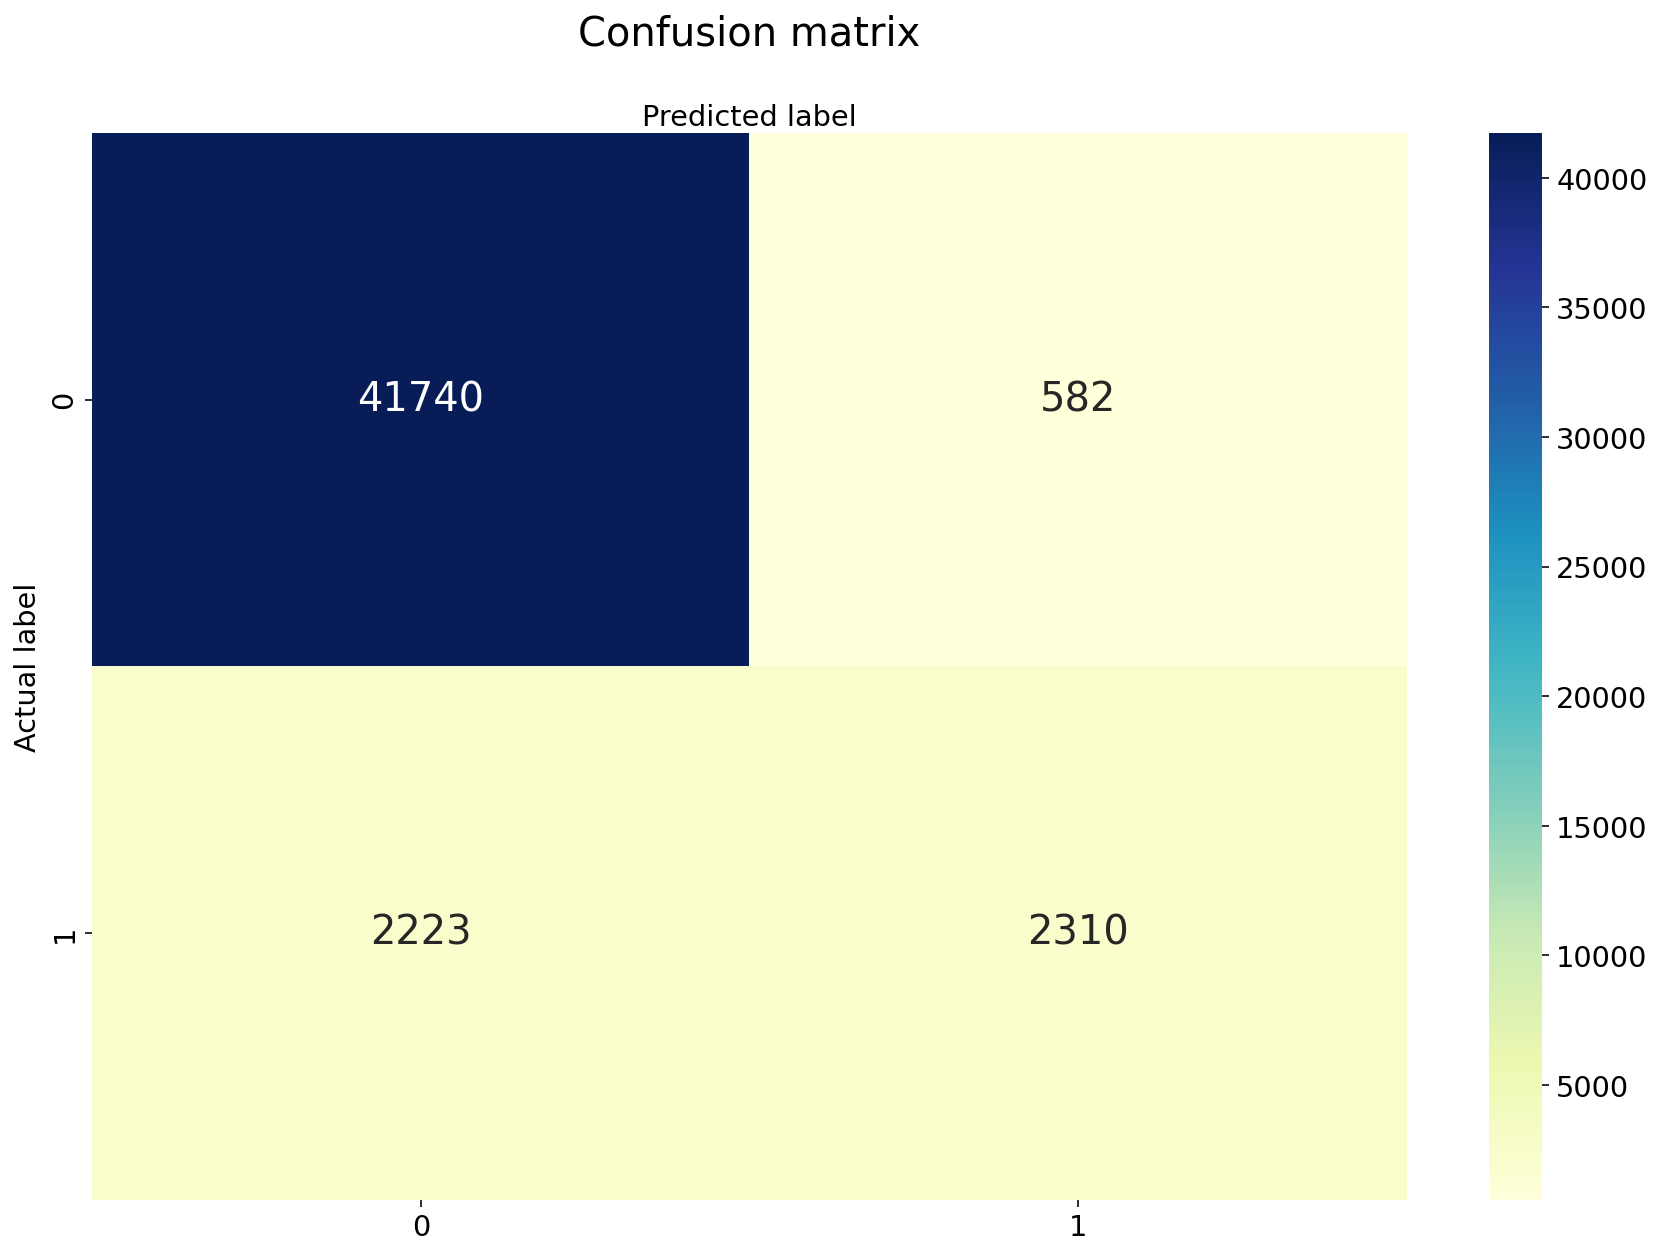

In [112]:
# Heatmap 
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap of confusion matrix for features versus All the overdeepenings
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g', annot_kws={"fontsize":20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1, fontsize = 20)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [17]:
scaler = StandardScaler()
lr = LogisticRegression()

In [18]:
# Fit the scaler on the training features and transform these in one go
X_train_std = scaler.fit_transform(X_train)

# Fit the logistic regression model on the scaled training data
lr.fit(X_train_std, y_train)

# Scaler the test features
X_test_std = scaler.transform(X_test)

# Predict diabetes presence on the scaled test set
y_pred = lr.predict(X_test_std)

# Print accuracy metrics and feature coefficients
print("{0:.1%} accuracy on test set.".format(accuracy_score(y_test, y_pred)))
print(dict(zip(x.columns, abs(lr.coef_[0]).round(2))))

94.0% accuracy on test set.
{'LAT': 0.16, 'LONG': 0.19, 'area_km2': 10.98, 'mean_elev_m': 0.41, 'era5_temp_c': 0.14, 'era5_total_precip_mperyr': 0.23}


In [19]:
from sklearn.feature_selection import RFE

# Create the RFE a LogisticRegression estimator and 3 features to select
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=1, verbose=1)

# Fits the eliminator to the data
rfe.fit(X_train_std, y_train)

# Print the features and their ranking (high = dropped early on)
print(dict(zip(x.columns, rfe.ranking_)))

# Print the features that are not elimiated
print(x.columns[rfe.support_])

# CAlculates the test set accuracy
acc = accuracy_score(y_test, rfe.predict(X_test_std))
print(" {0:.1%} accuracy on test set.".format(acc))

Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
{'LAT': 5, 'LONG': 2, 'area_km2': 1, 'mean_elev_m': 3, 'era5_temp_c': 6, 'era5_total_precip_mperyr': 4}
Index(['area_km2'], dtype='object')
 94.0% accuracy on test set.


In [20]:
# check the overdeepenings relative to one another
yy = df.OD_Large
y = df.OD_All
logit_model=sm.Logit(yy,y)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.652882
         Iterations 6
                          Results: Logit
Model:              Logit            Pseudo R-squared: -14.248    
Dependent Variable: OD_Large         AIC:              244725.8526
Date:               2022-02-01 03:38 BIC:              244735.9936
No. Observations:   187418           Log-Likelihood:   -1.2236e+05
Df Model:           0                LL-Null:          -8024.7    
Df Residuals:       187417           LLR p-value:      nan        
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
OD_All    -2.4968     0.0283   -88.3090   0.0000   -2.5522   -2.4414



In [21]:
# Make ROC curve
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier();
clf_reg = LogisticRegression();

clf_tree.fit(X_train, y_train); 
clf_reg.fit(X_train, y_train);

In [22]:
# make scores of decision tree
y_score1 = clf_tree.predict_proba(X_test)[:,1]
y_score2 = clf_reg.predict_proba(X_test)[:,1]

In [23]:
# ROC score for Decision tree v. logistic reg.
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)

from sklearn.metrics import roc_curve, roc_auc_score
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score2))

roc_auc_score for DecisionTree:  0.8871645423909744
roc_auc_score for Logistic Regression:  0.9709376381612161


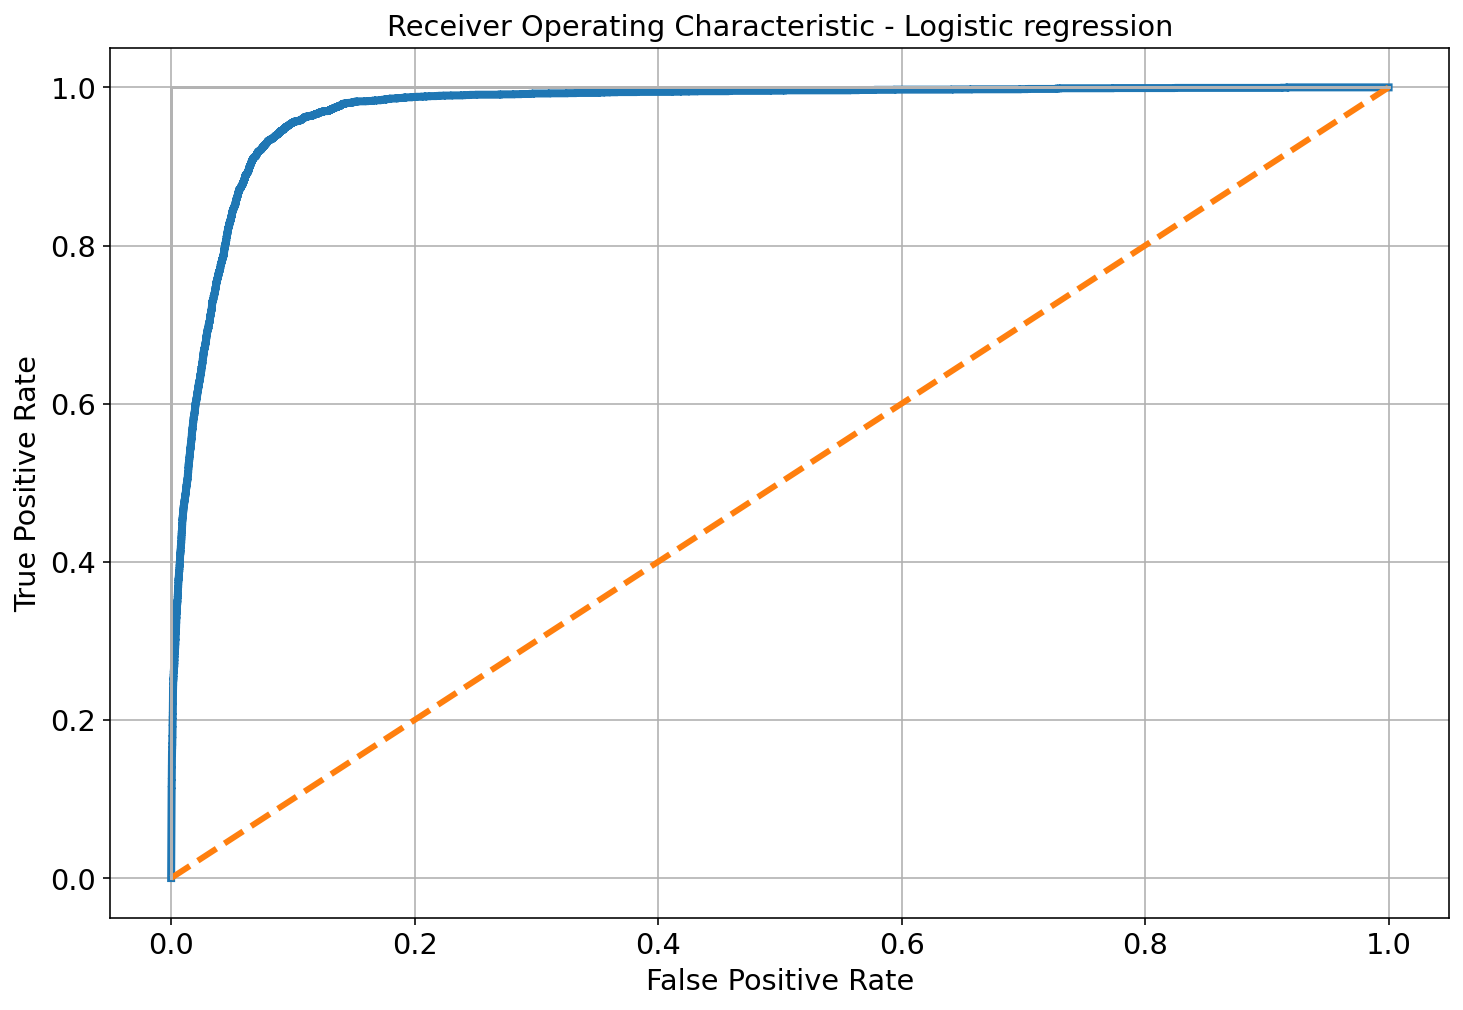

In [113]:
# make graph of ROC curve
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate2, true_positive_rate2, lw = 4)
plt.plot([0, 1], ls="--", lw = 3)
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid()
plt.show()

In [25]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
# Fit the scaler on the training features and transform these in one go
X_train_std = scaler.fit_transform(X_train)

# Fit the logistic regression model on the scaled training data
lr.fit(X_train_std, y_train)

# Scaler the test features
X_test_std = scaler.transform(X_test)

# Predict diabetes presence on the scaled test set
y_pred = lr.predict(X_test_std)

# Print accuracy metrics and feature coefficients
print("{0:.1%} accuracy on test set.".format(accuracy_score(y_test, y_pred)))
print(dict(zip(x.columns, abs(lr.coef_[0]).round(2))))

94.0% accuracy on test set.
{'LAT': 0.16, 'LONG': 0.19, 'area_km2': 10.98, 'mean_elev_m': 0.41, 'era5_temp_c': 0.14, 'era5_total_precip_mperyr': 0.23}


## Random Forest Regressor
The random forest regressor uses supervised learning to find the most critical features in the model that help predict whether a glacier has and overdeepening. A random forest uses many decision trees and outputs the most optimal result.

In [26]:
# normalize the features
x_norm = (x - x.mean()) / x.std()

In [27]:
# train the dataset 75:25
X_train, X_test, y_train, y_test = train_test_split(x_norm, y, test_size=0.25, random_state=0)

In [28]:
# use random forest regressor to find the feature importance of each feature
# TAKES A LONG TIME TO RUN!!
rf = RandomForestRegressor(n_estimators=300)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300)

In [29]:
X_names = x.rename(columns = {'LAT':'Latitude', 'LONG' : 'Longitude', 'mean_elev_m':'Mean Elevation',
                              'era5_temp_c':'Temperature', 'era5_total_precip_mperyr': 'Precipitation', 'area_km2': 'Area'})

Text(0.5, 1.0, 'Feature Importance with Area')

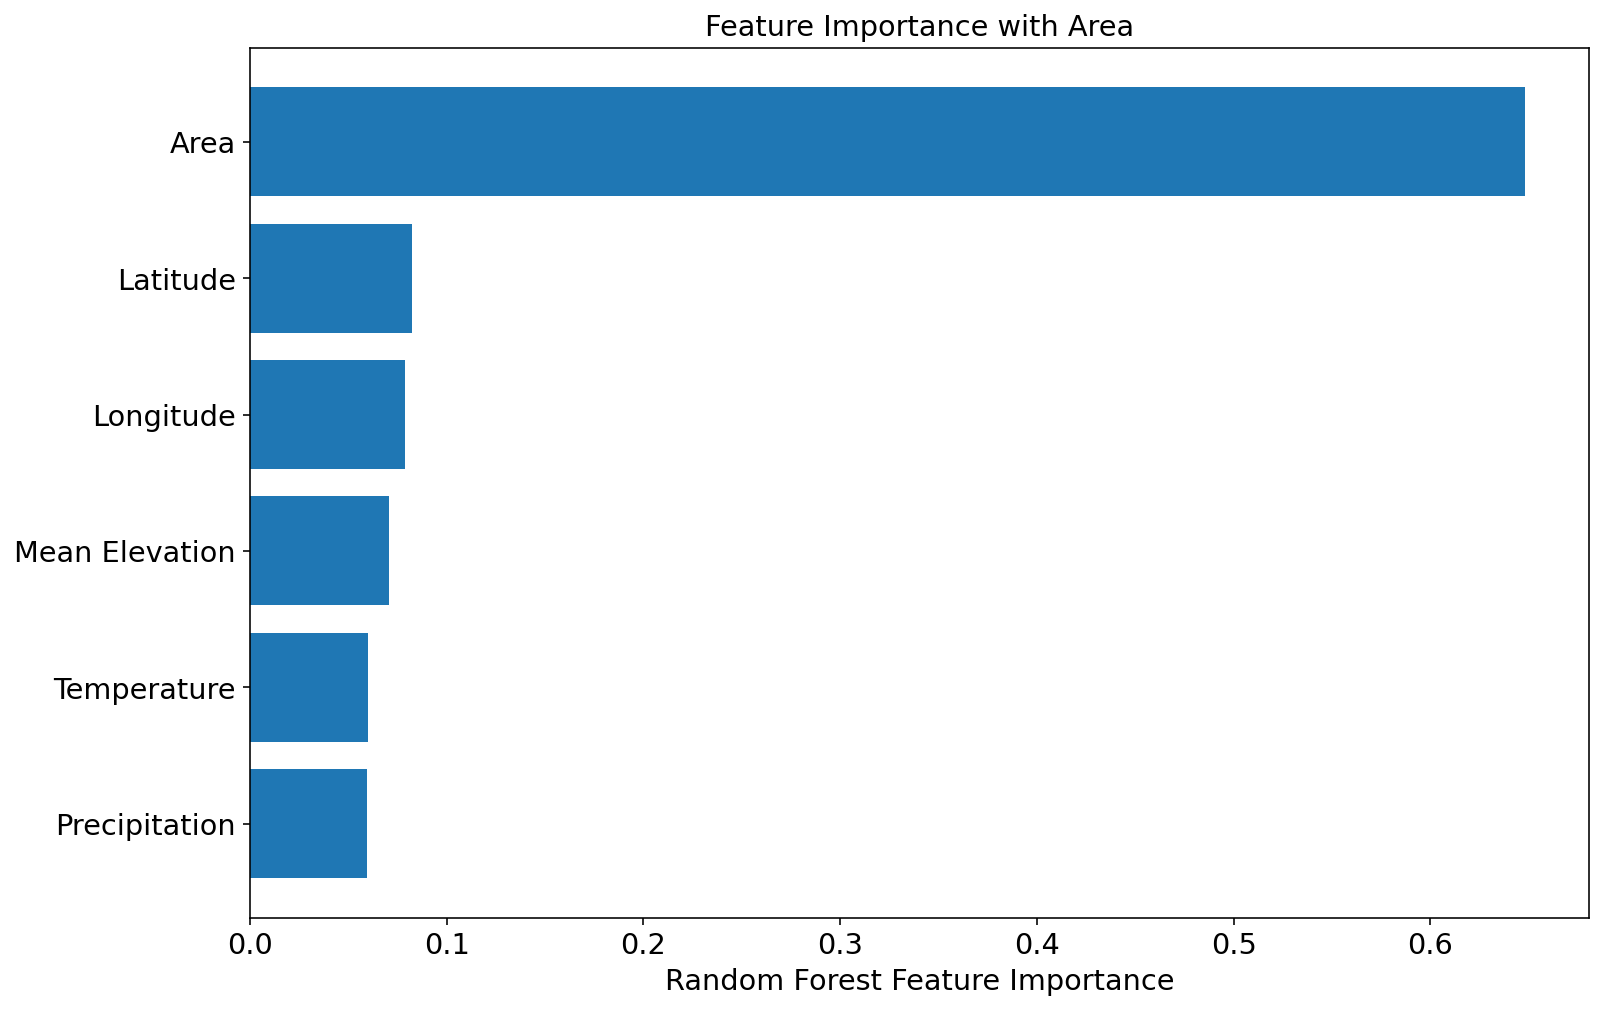

In [121]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X_names.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title('Feature Importance with Area')

## Kmeans Clustering
The kmeans algorithim begins by random partioning of the data points into groups. The algorithim incrementally improves until it converges.

In a general sense, observations are assigned to the cluster centroid to which they are closest, using an Euclidean (squared difference) dissimilarity criterion.

In [31]:
# TAKES A LONG TIME TO RUN

# make kmeans model; NUMBER OF CLUSTERS IS "n_clusters"
kmeans = KMeans(n_clusters=10, n_init= 300, max_iter=1000, algorithm= 'elkan', random_state=42)

# choose features to go into the clustering model
kmeans_features = ['LAT',	'LONG',	'area_km2',	'mean_elev_m','era5_temp_c','era5_total_precip_mperyr']

clust = kmeans.fit_predict(x_norm[kmeans_features])

# add clusters back to non-normalized dataset
x['Cluster'] = clust


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [40]:
df['Cluster'] = clust

In [41]:
clust_lst = [0,1,2,3,4,5,6,7,8,9] # list of number of clusters

for y in clust_lst:
  globals()[f'clust_{y}'] = df[df['Cluster'] == y]

  # Now all the dataframes are saved by cluster so just type in clust_1, clust_2, etc...

In [44]:
# This shows how many overdeepenings there are relative to the number of rows in the clustered dataframe

print('df_0 relative OD = ', ((clust_0.OD_Large == 1).sum() / len(clust_0.OD_Large) *100))
print('df_1 relative OD = ', ((clust_1.OD_Large == 1).sum() / len(clust_1.OD_Large) *100))
print('df_2 relative OD = ', ((clust_2.OD_Large == 1).sum() / len(clust_2.OD_Large) *100))
print('df_3 relative OD = ', ((clust_3.OD_Large == 1).sum() / len(clust_3.OD_Large) *100))
print('df_4 relative OD = ', ((clust_4.OD_Large == 1).sum() / len(clust_4.OD_Large) *100))
print('df_5 relative OD = ', ((clust_5.OD_Large == 1).sum() / len(clust_5.OD_Large) *100))
print('df_6 relative OD = ', ((clust_6.OD_Large == 1).sum() / len(clust_6.OD_Large) *100))
print('df_7 relative OD = ', ((clust_7.OD_Large == 1).sum() / len(clust_7.OD_Large) *100))
print('df_8 relative OD = ', ((clust_8.OD_Large == 1).sum() / len(clust_8.OD_Large) *100))
print('df_9 relative OD = ', ((clust_9.OD_Large == 1).sum() / len(clust_9.OD_Large) *100))

df_0 relative OD =  0.7617360496014172
df_1 relative OD =  0.5466273095003826
df_2 relative OD =  91.30434782608695
df_3 relative OD =  0.2733781731395097
df_4 relative OD =  0.8557096488639717
df_5 relative OD =  0.4511333801723182
df_6 relative OD =  0.703862660944206
df_7 relative OD =  0.3978432706904675
df_8 relative OD =  95.08196721311475
df_9 relative OD =  0.47106325706594887


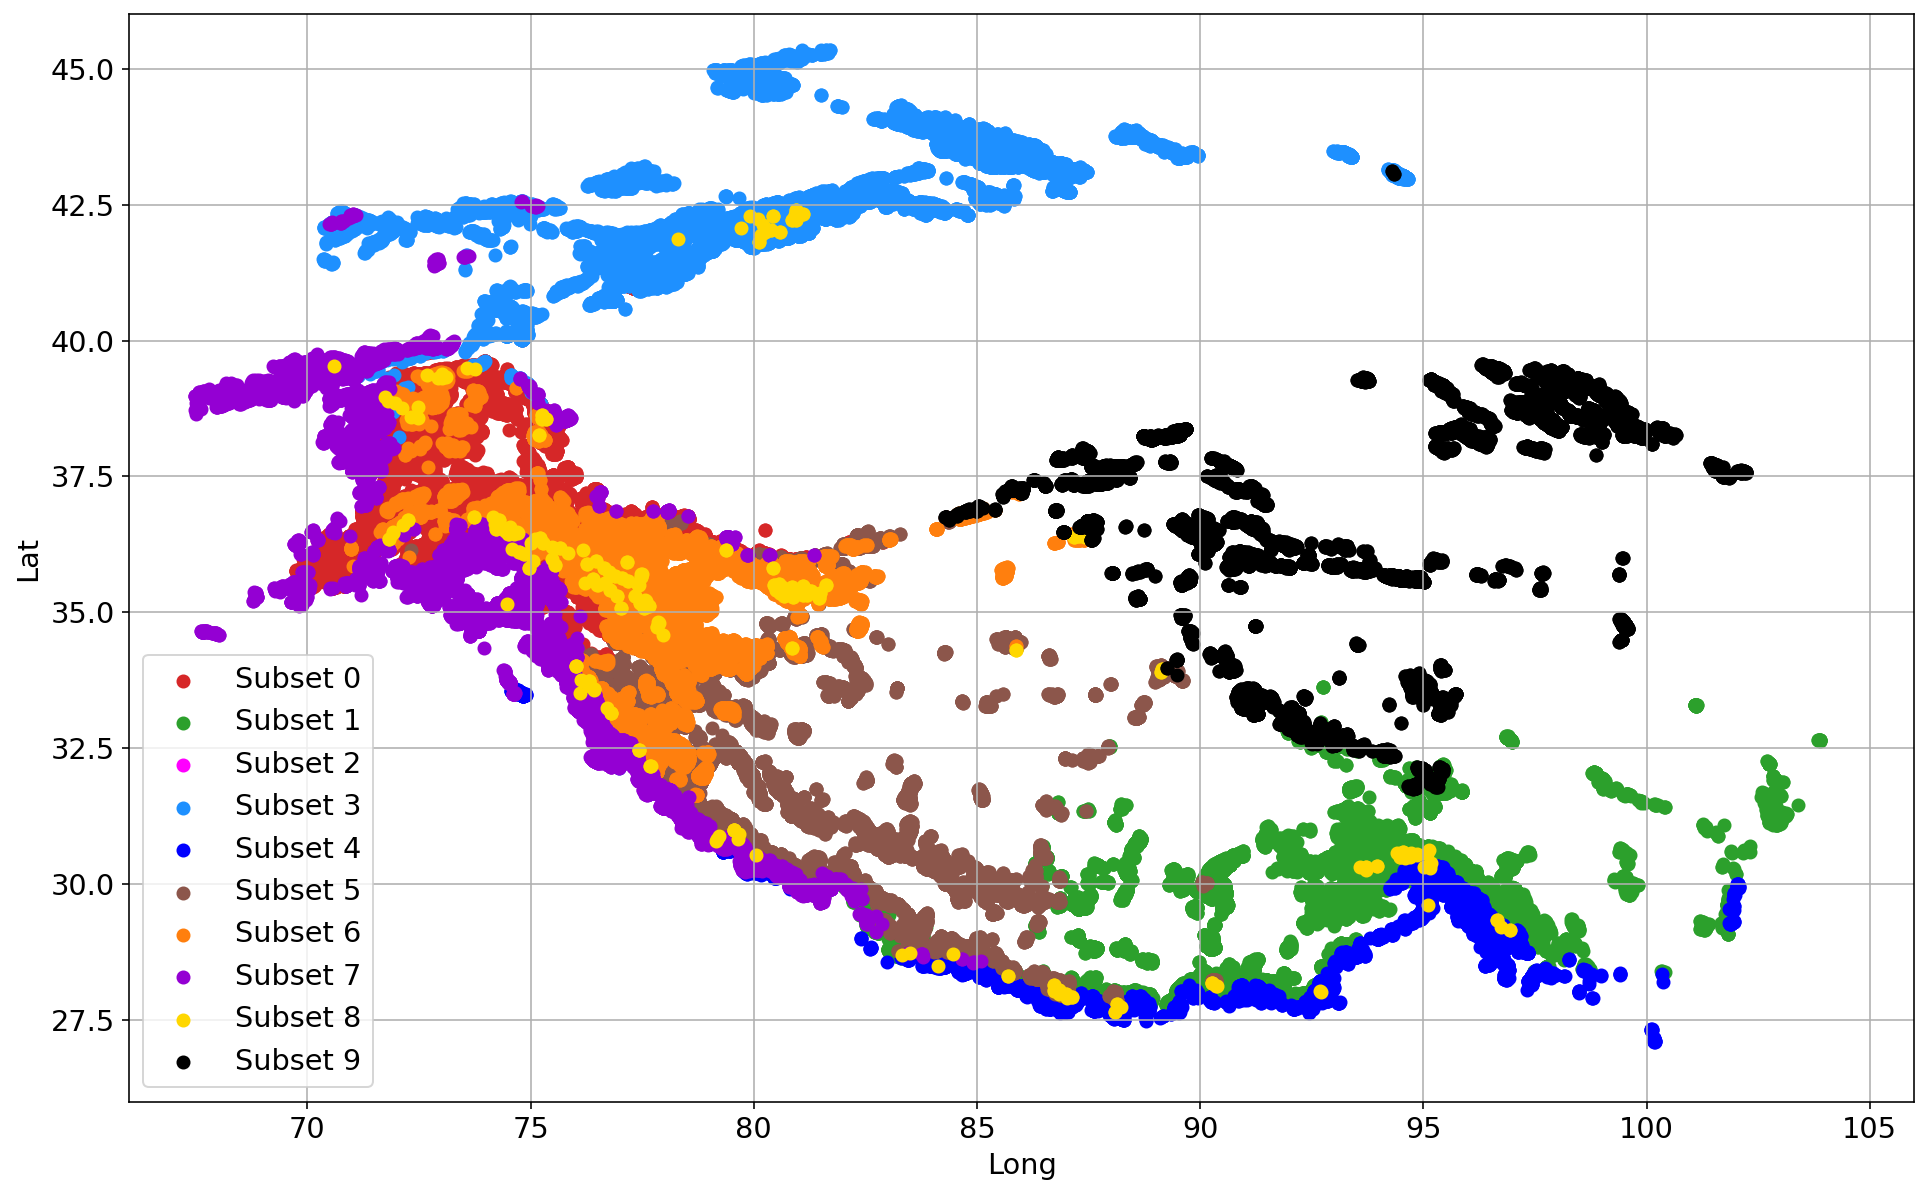

In [60]:
# plot of the clusters from the previous algorithim run
fig, ax = plt.subplots(1,1, figsize=(16,10))

ax.grid()


ax.scatter(clust_0.LONG, clust_0.LAT, label = 'Subset 0', color = 'tab:red')
ax.scatter(clust_1.LONG, clust_1.LAT, label = 'Subset 1', color = 'tab:green')
ax.scatter(clust_2.LONG, clust_2.LAT, label = 'Subset 2', color = 'magenta')
ax.scatter(clust_3.LONG, clust_3.LAT, label = 'Subset 3', color = 'dodgerblue')
ax.scatter(clust_4.LONG, clust_4.LAT, label = 'Subset 4', color = 'b')
ax.scatter(clust_5.LONG, clust_5.LAT, label = 'Subset 5', color = 'tab:brown')
ax.scatter(clust_6.LONG, clust_6.LAT, label = 'Subset 6', color = 'tab:orange')
ax.scatter(clust_7.LONG, clust_7.LAT, label = 'Subset 7', color = 'darkviolet')#, color = 'tab:brown')
ax.scatter(clust_8.LONG, clust_8.LAT, label = 'Subset 8', color = 'gold')
ax.scatter(clust_9.LONG, clust_9.LAT, label = 'Subset 9', color = 'black')


ax.set_xlabel('Long')
ax.set_ylabel('Lat')
ax.set_xlim(66,106)
ax.set_ylim(26,46)
#ax.set_title('HMA Mountain Subsets')
ax.legend()

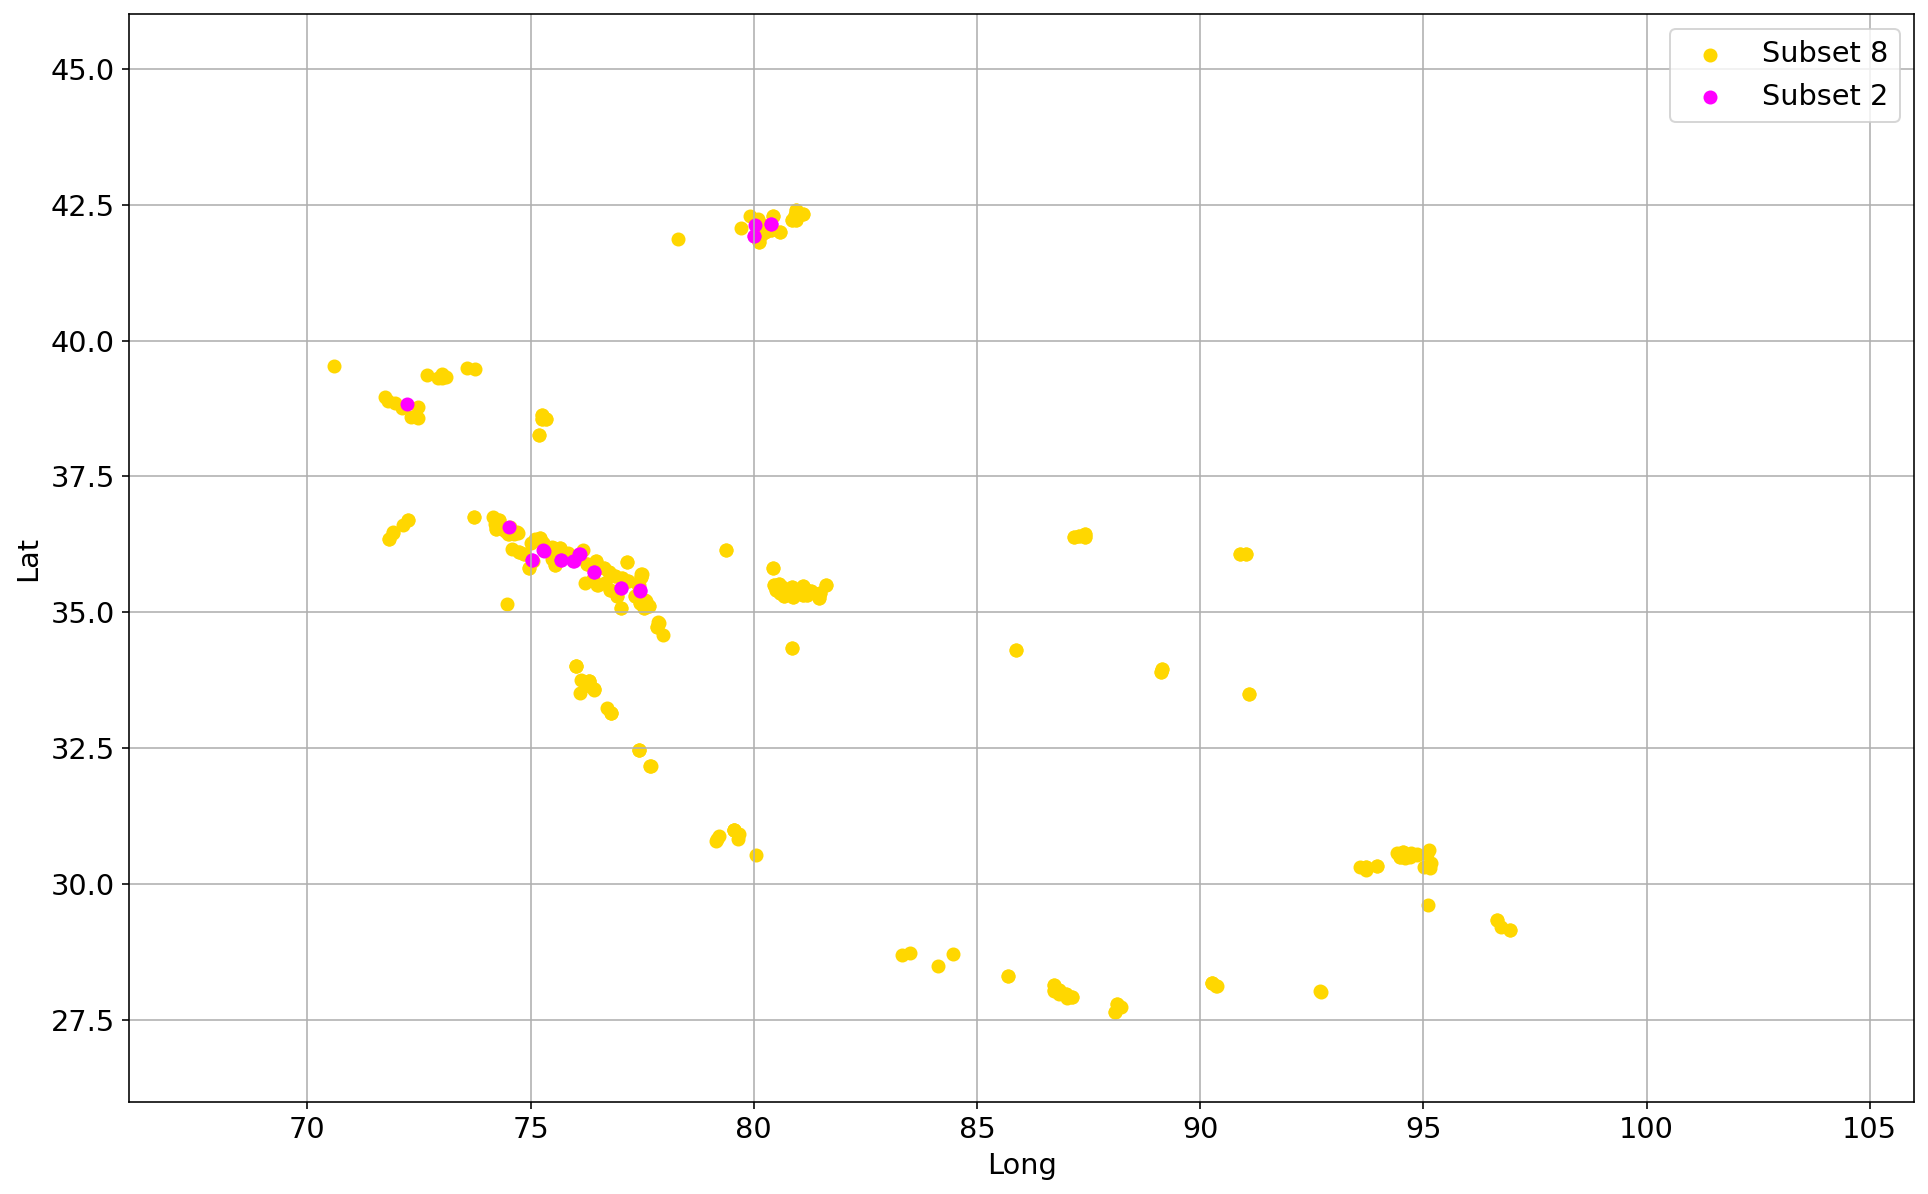

In [120]:
# Spatial plot of the two clusters with the highest relative OD%
fig, ax = plt.subplots(1,1, figsize=(16,10))

ax.grid()

ax.scatter(clust_8.LONG, clust_8.LAT, label = 'Subset 8', color = 'gold')
ax.scatter(clust_2.LONG, clust_2.LAT, label = 'Subset 2', color = 'magenta')


ax.set_xlabel('Long')
ax.set_ylabel('Lat')
ax.set_xlim(66,106)
ax.set_ylim(26,46)
#ax.set_title('HMA Mountain Subsets')
ax.legend()

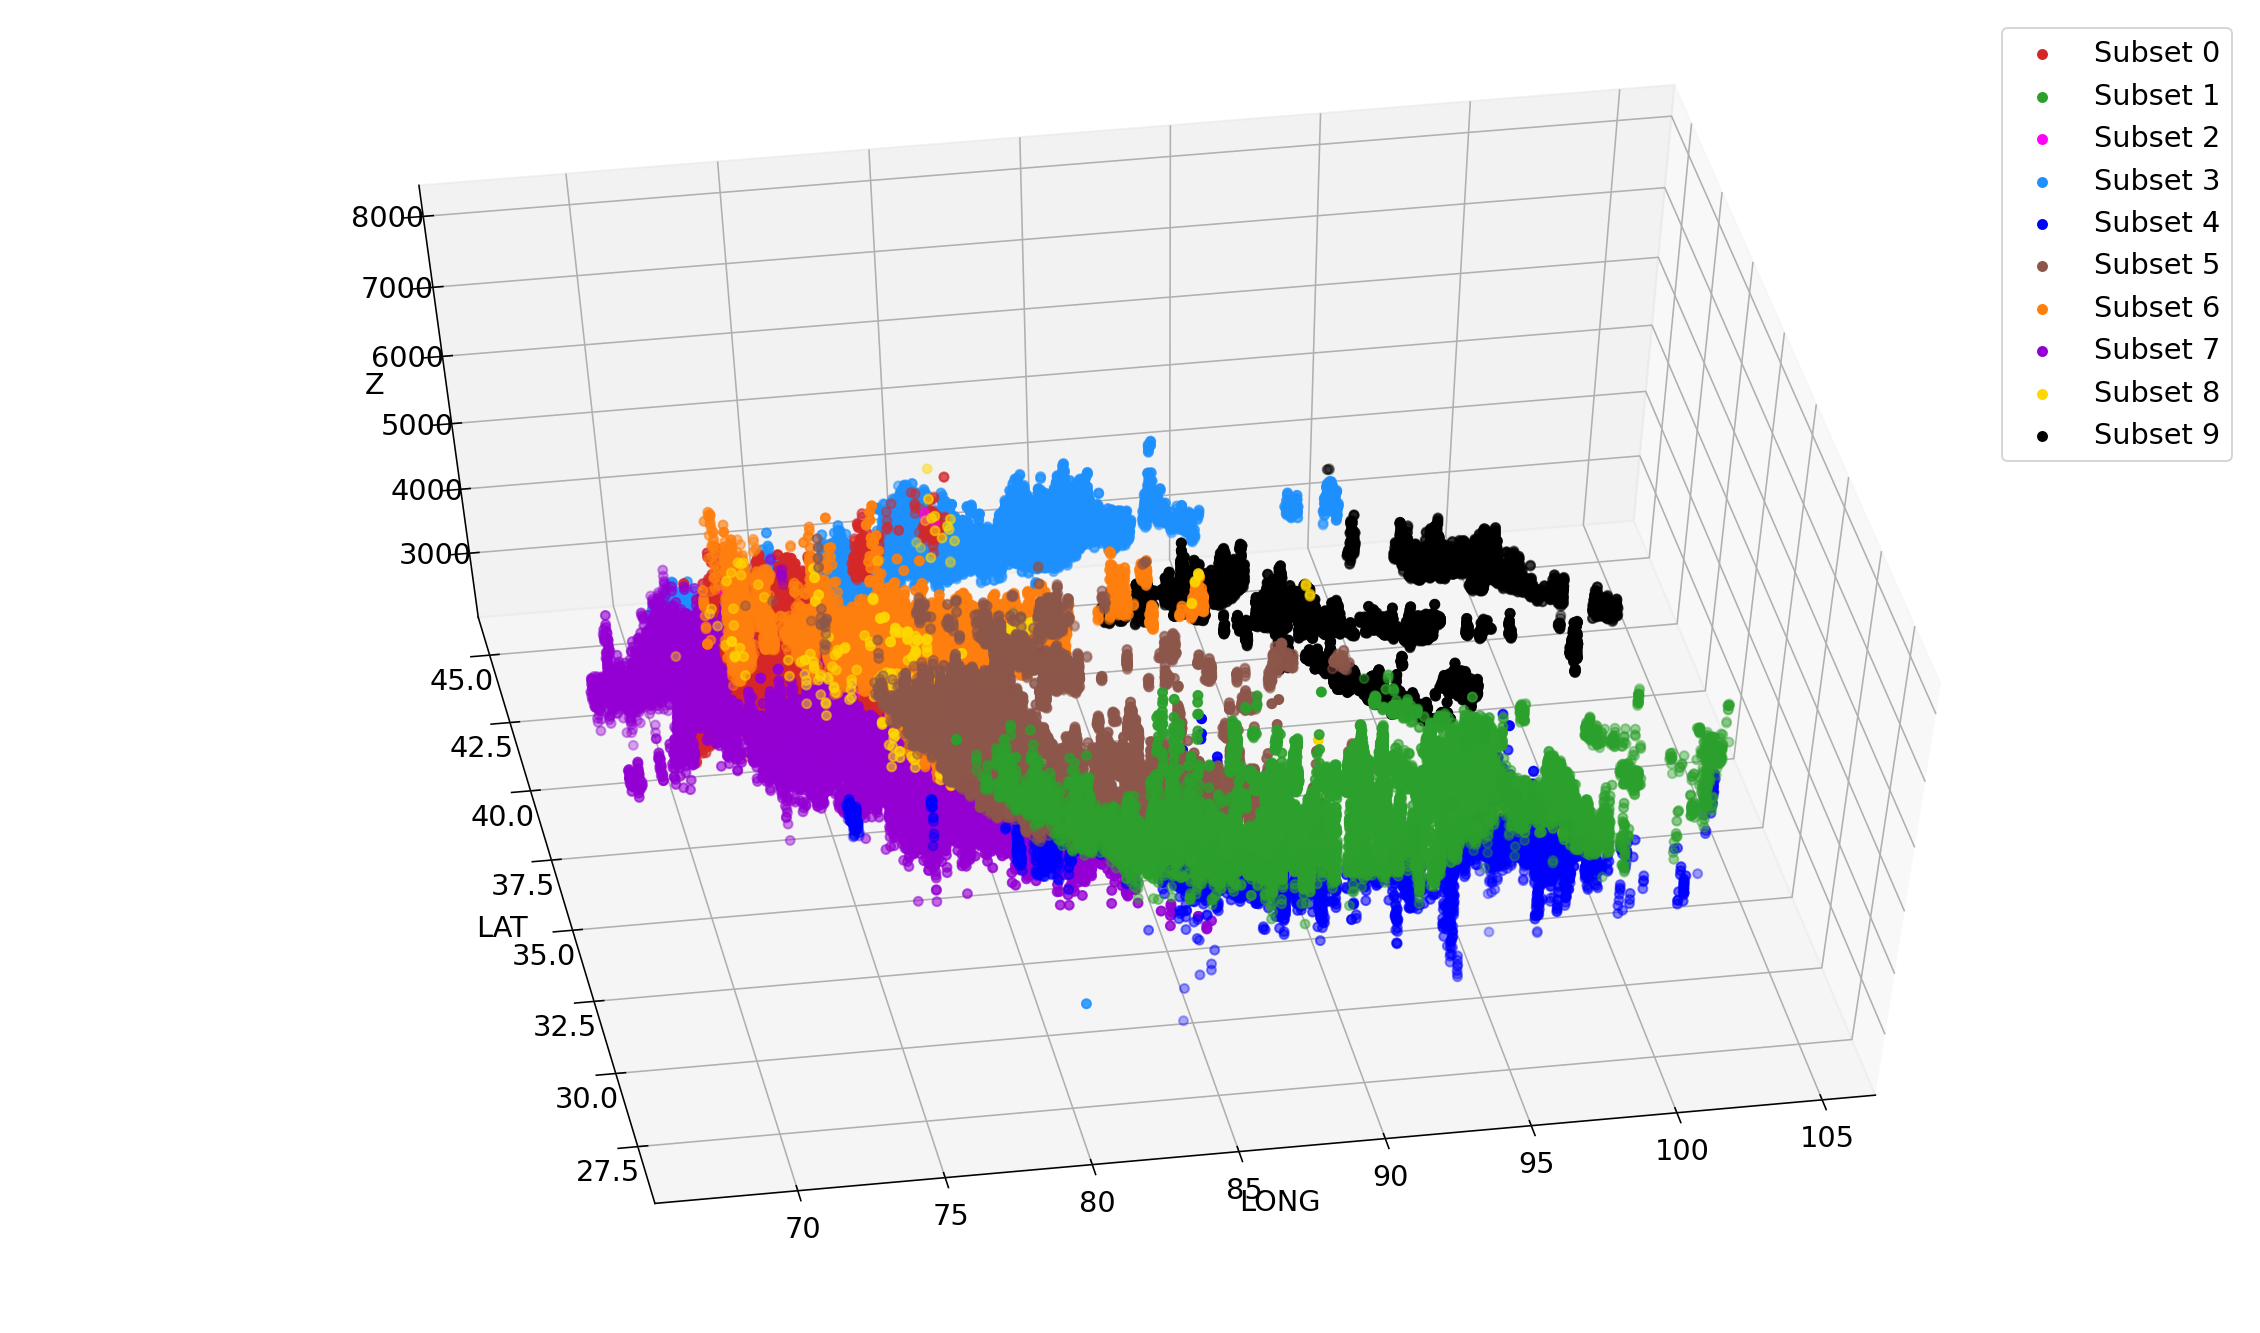

In [69]:
# A 3D representation of the data

fig = plt.figure(figsize=(20,12))
ax = plt.axes(projection='3d')
ax.view_init(55, 260)

ax.scatter3D(clust_0.LONG, clust_0.LAT, clust_0.mean_elev_m, label = 'Subset 0', color = 'tab:red')
ax.scatter3D(clust_1.LONG, clust_1.LAT, clust_1.mean_elev_m, label = 'Subset 1', color = 'tab:green')
ax.scatter3D(clust_2.LONG, clust_2.LAT, clust_2.mean_elev_m, label = 'Subset 2', color = 'magenta')
ax.scatter3D(clust_3.LONG, clust_3.LAT, clust_3.mean_elev_m, label = 'Subset 3', color = 'dodgerblue')
ax.scatter3D(clust_4.LONG, clust_4.LAT, clust_4.mean_elev_m, label = 'Subset 4', color = 'b')
ax.scatter3D(clust_5.LONG, clust_5.LAT, clust_5.mean_elev_m, label = 'Subset 5', color = 'tab:brown')
ax.scatter3D(clust_6.LONG, clust_6.LAT, clust_6.mean_elev_m, label = 'Subset 6', color = 'tab:orange')
ax.scatter3D(clust_7.LONG, clust_7.LAT, clust_7.mean_elev_m, label = 'Subset 7', color = 'darkviolet')
ax.scatter3D(clust_8.LONG, clust_8.LAT, clust_8.mean_elev_m, label = 'Subset 8', color = 'gold')#, color = 'tab:orange')
ax.scatter3D(clust_9.LONG, clust_9.LAT, clust_9.mean_elev_m, label = 'Subset 9', color = 'black')


ax.set_xlabel('LONG')
ax.set_ylabel('LAT')
ax.set_zlabel('Z')

ax.set_xlim(66,106)
ax.set_ylim(26,46)
ax.set_zlim(2100,8300)

ax.legend()

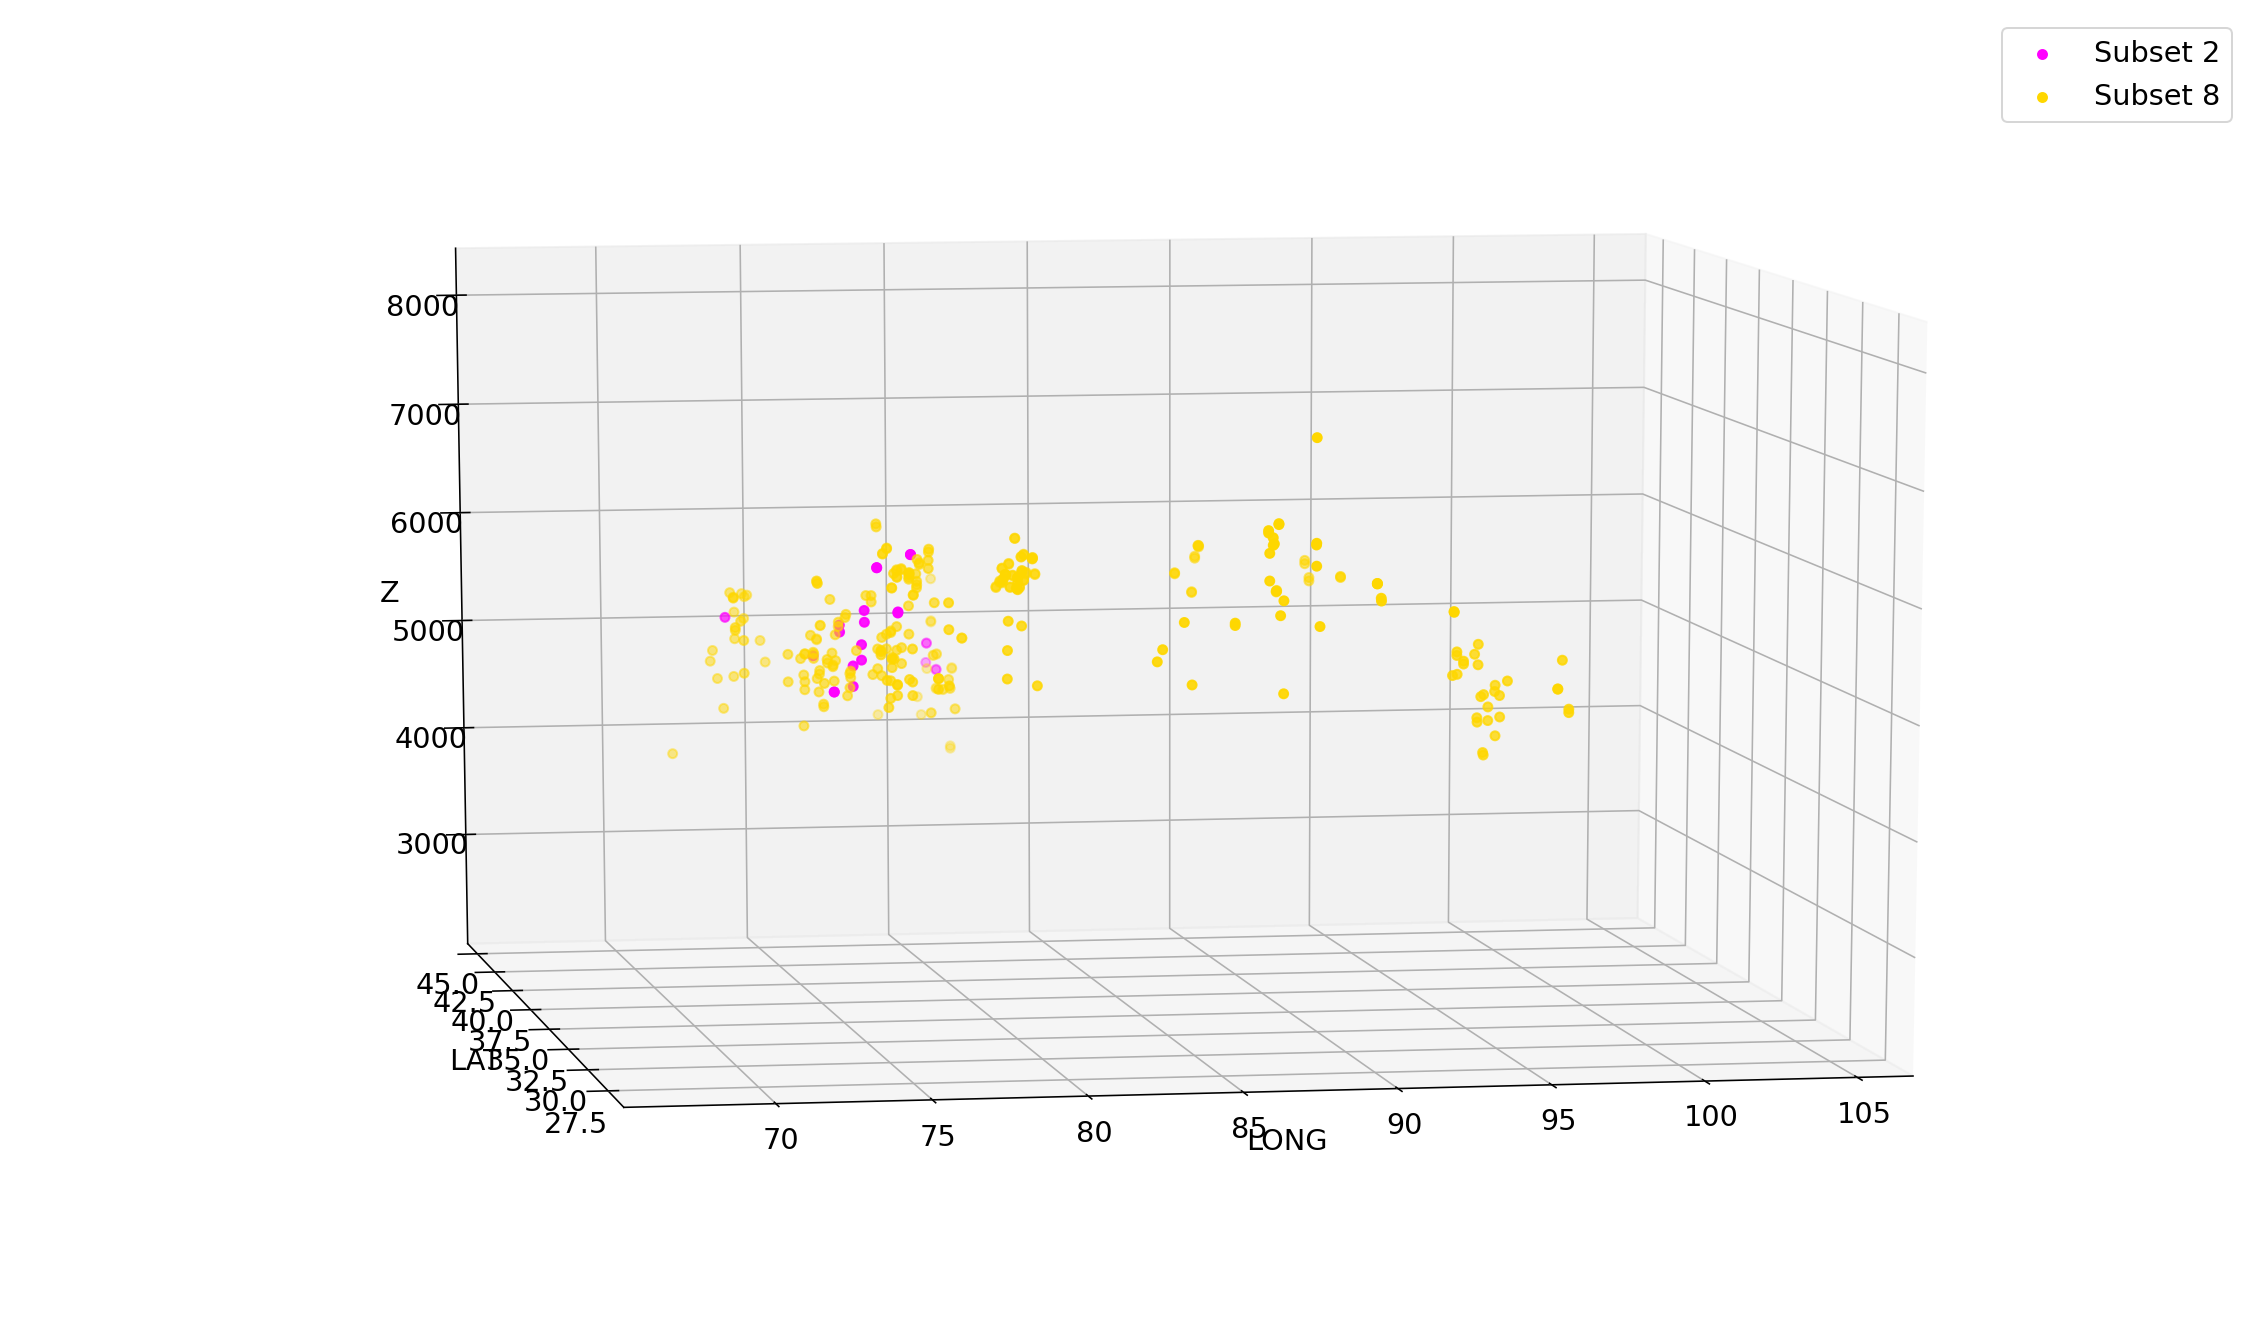

In [70]:
fig = plt.figure(figsize=(20,12))
ax = plt.axes(projection='3d')
ax.view_init(10, 260) # change the view of the vertical and horizontal rotation, respectivally (y,x)

ax.scatter3D(clust_2.LONG, clust_2.LAT, clust_2.mean_elev_m, label = 'Subset 2', color = 'magenta')
ax.scatter3D(clust_8.LONG, clust_8.LAT, clust_8.mean_elev_m, label = 'Subset 8', color = 'gold')#, color = 'tab:orange')


ax.set_xlabel('LONG')
ax.set_ylabel('LAT')
ax.set_zlabel('Z')
ax.set_xlim(66,106)
ax.set_ylim(26,46)
ax.set_zlim(2100,8300)
ax.legend()

## Kmeans clustering HMA by region; Linear Regression
The glaciers are clustered by latitude, longitude, elevation, temperature, and precipitation. We ask if we can seperate features in the HMA area into clusters based off of the features.

In [72]:
# TAKES A LONG TIME TO RUN

# make kmeans model; NUMBER OF CLUSTERS IS "n_clusters"
kmeans = KMeans(n_clusters=6, n_init= 300, max_iter=1000, algorithm= 'elkan', random_state=42)

# choose features to go into the clustering model
kmeans_features = ['LAT',	'LONG',	'mean_elev_m','era5_temp_c','era5_total_precip_mperyr']

clust = kmeans.fit_predict(x_norm[kmeans_features])

# add clusters back to non-normalized dataset; Cluster_2 this time
df['Cluster_2'] = clust

In [74]:
clust_lst_2 = [0,1,2,3,4,5] # list of number of clusters

for y in clust_lst_2:
  globals()[f'clust2_{y}'] = df[df['Cluster_2'] == y]

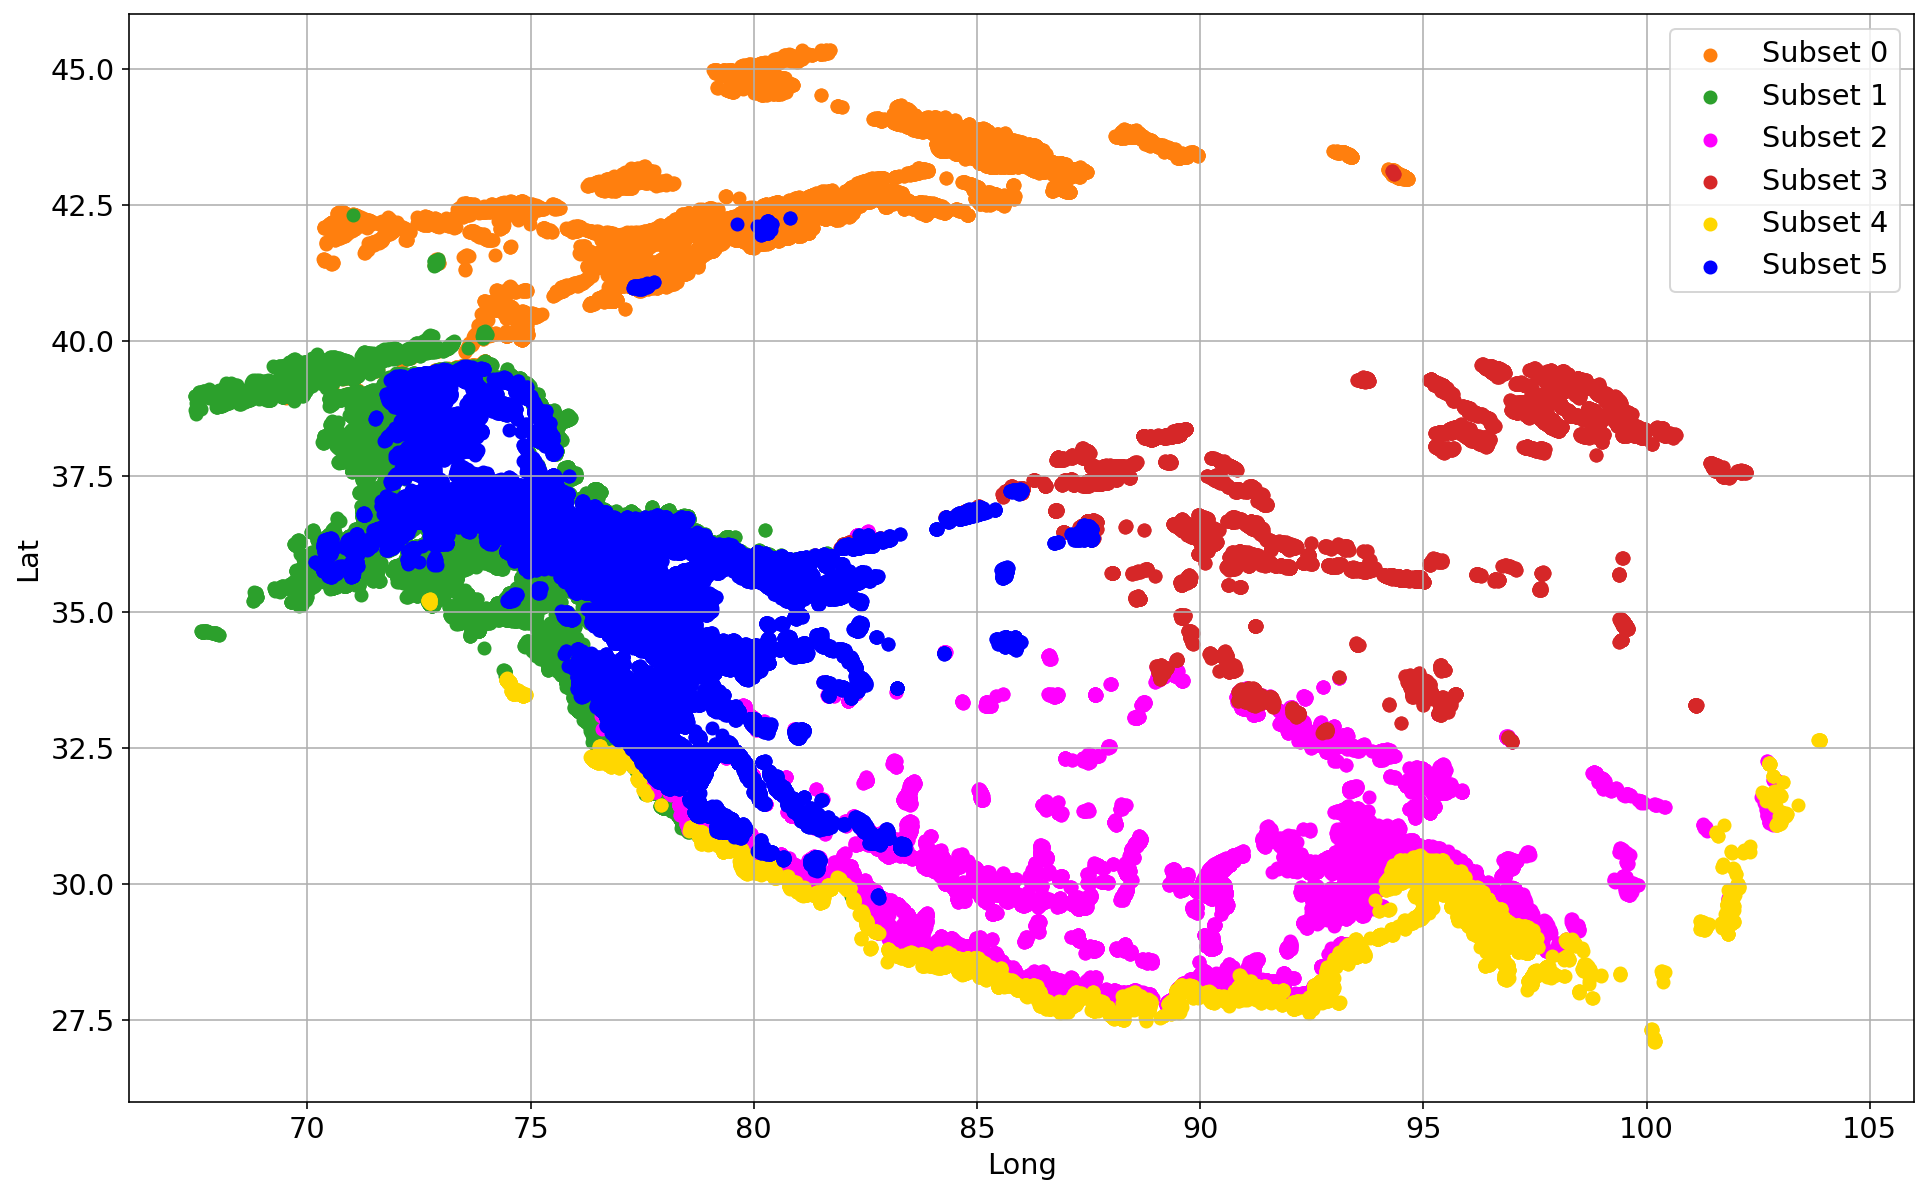

In [78]:
fig, ax = plt.subplots(1,1, figsize=(16,10))

ax.grid()

ax.scatter(clust2_0.LONG, clust2_0.LAT, label = 'Subset 0', color = 'tab:orange')
ax.scatter(clust2_1.LONG, clust2_1.LAT, label = 'Subset 1', color = 'tab:green')
ax.scatter(clust2_2.LONG, clust2_2.LAT, label = 'Subset 2', color = 'magenta')
ax.scatter(clust2_3.LONG, clust2_3.LAT, label = 'Subset 3', color = 'tab:red')
ax.scatter(clust2_4.LONG, clust2_4.LAT, label = 'Subset 4', color = 'gold')
ax.scatter(clust2_5.LONG, clust2_5.LAT, label = 'Subset 5', color = 'b')

ax.set_xlabel('Long')
ax.set_ylabel('Lat')

ax.set_xlim(66,106)
ax.set_ylim(26,46)

ax.legend()

In [82]:
# Total Dataset
y_total = df.mean_elev_m
x_total = df.LAT

x2 = sm.add_constant(x_total) # necessary if we want regression equation to have intercept

mod_uni = sm.OLS(y_total,x2).fit()

print(mod_uni)
print(mod_uni.summary())

y_pred_uni_total = mod_uni.fittedvalues


print('R^2 = ',mod_uni.rsquared)

rmse_err_uni = mean_squared_error(y_total, y_pred_uni_total,squared=False)
print('RMSE = ',rmse_err_uni)

                            OLS Regression Results                            
Dep. Variable:            mean_elev_m   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                 1.581e+05
Date:                Tue, 01 Feb 2022   Prob (F-statistic):               0.00
Time:                        04:27:12   Log-Likelihood:            -1.4244e+06
No. Observations:              187418   AIC:                         2.849e+06
Df Residuals:                  187416   BIC:                         2.849e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8823.8271      9.222    956.783      0.0

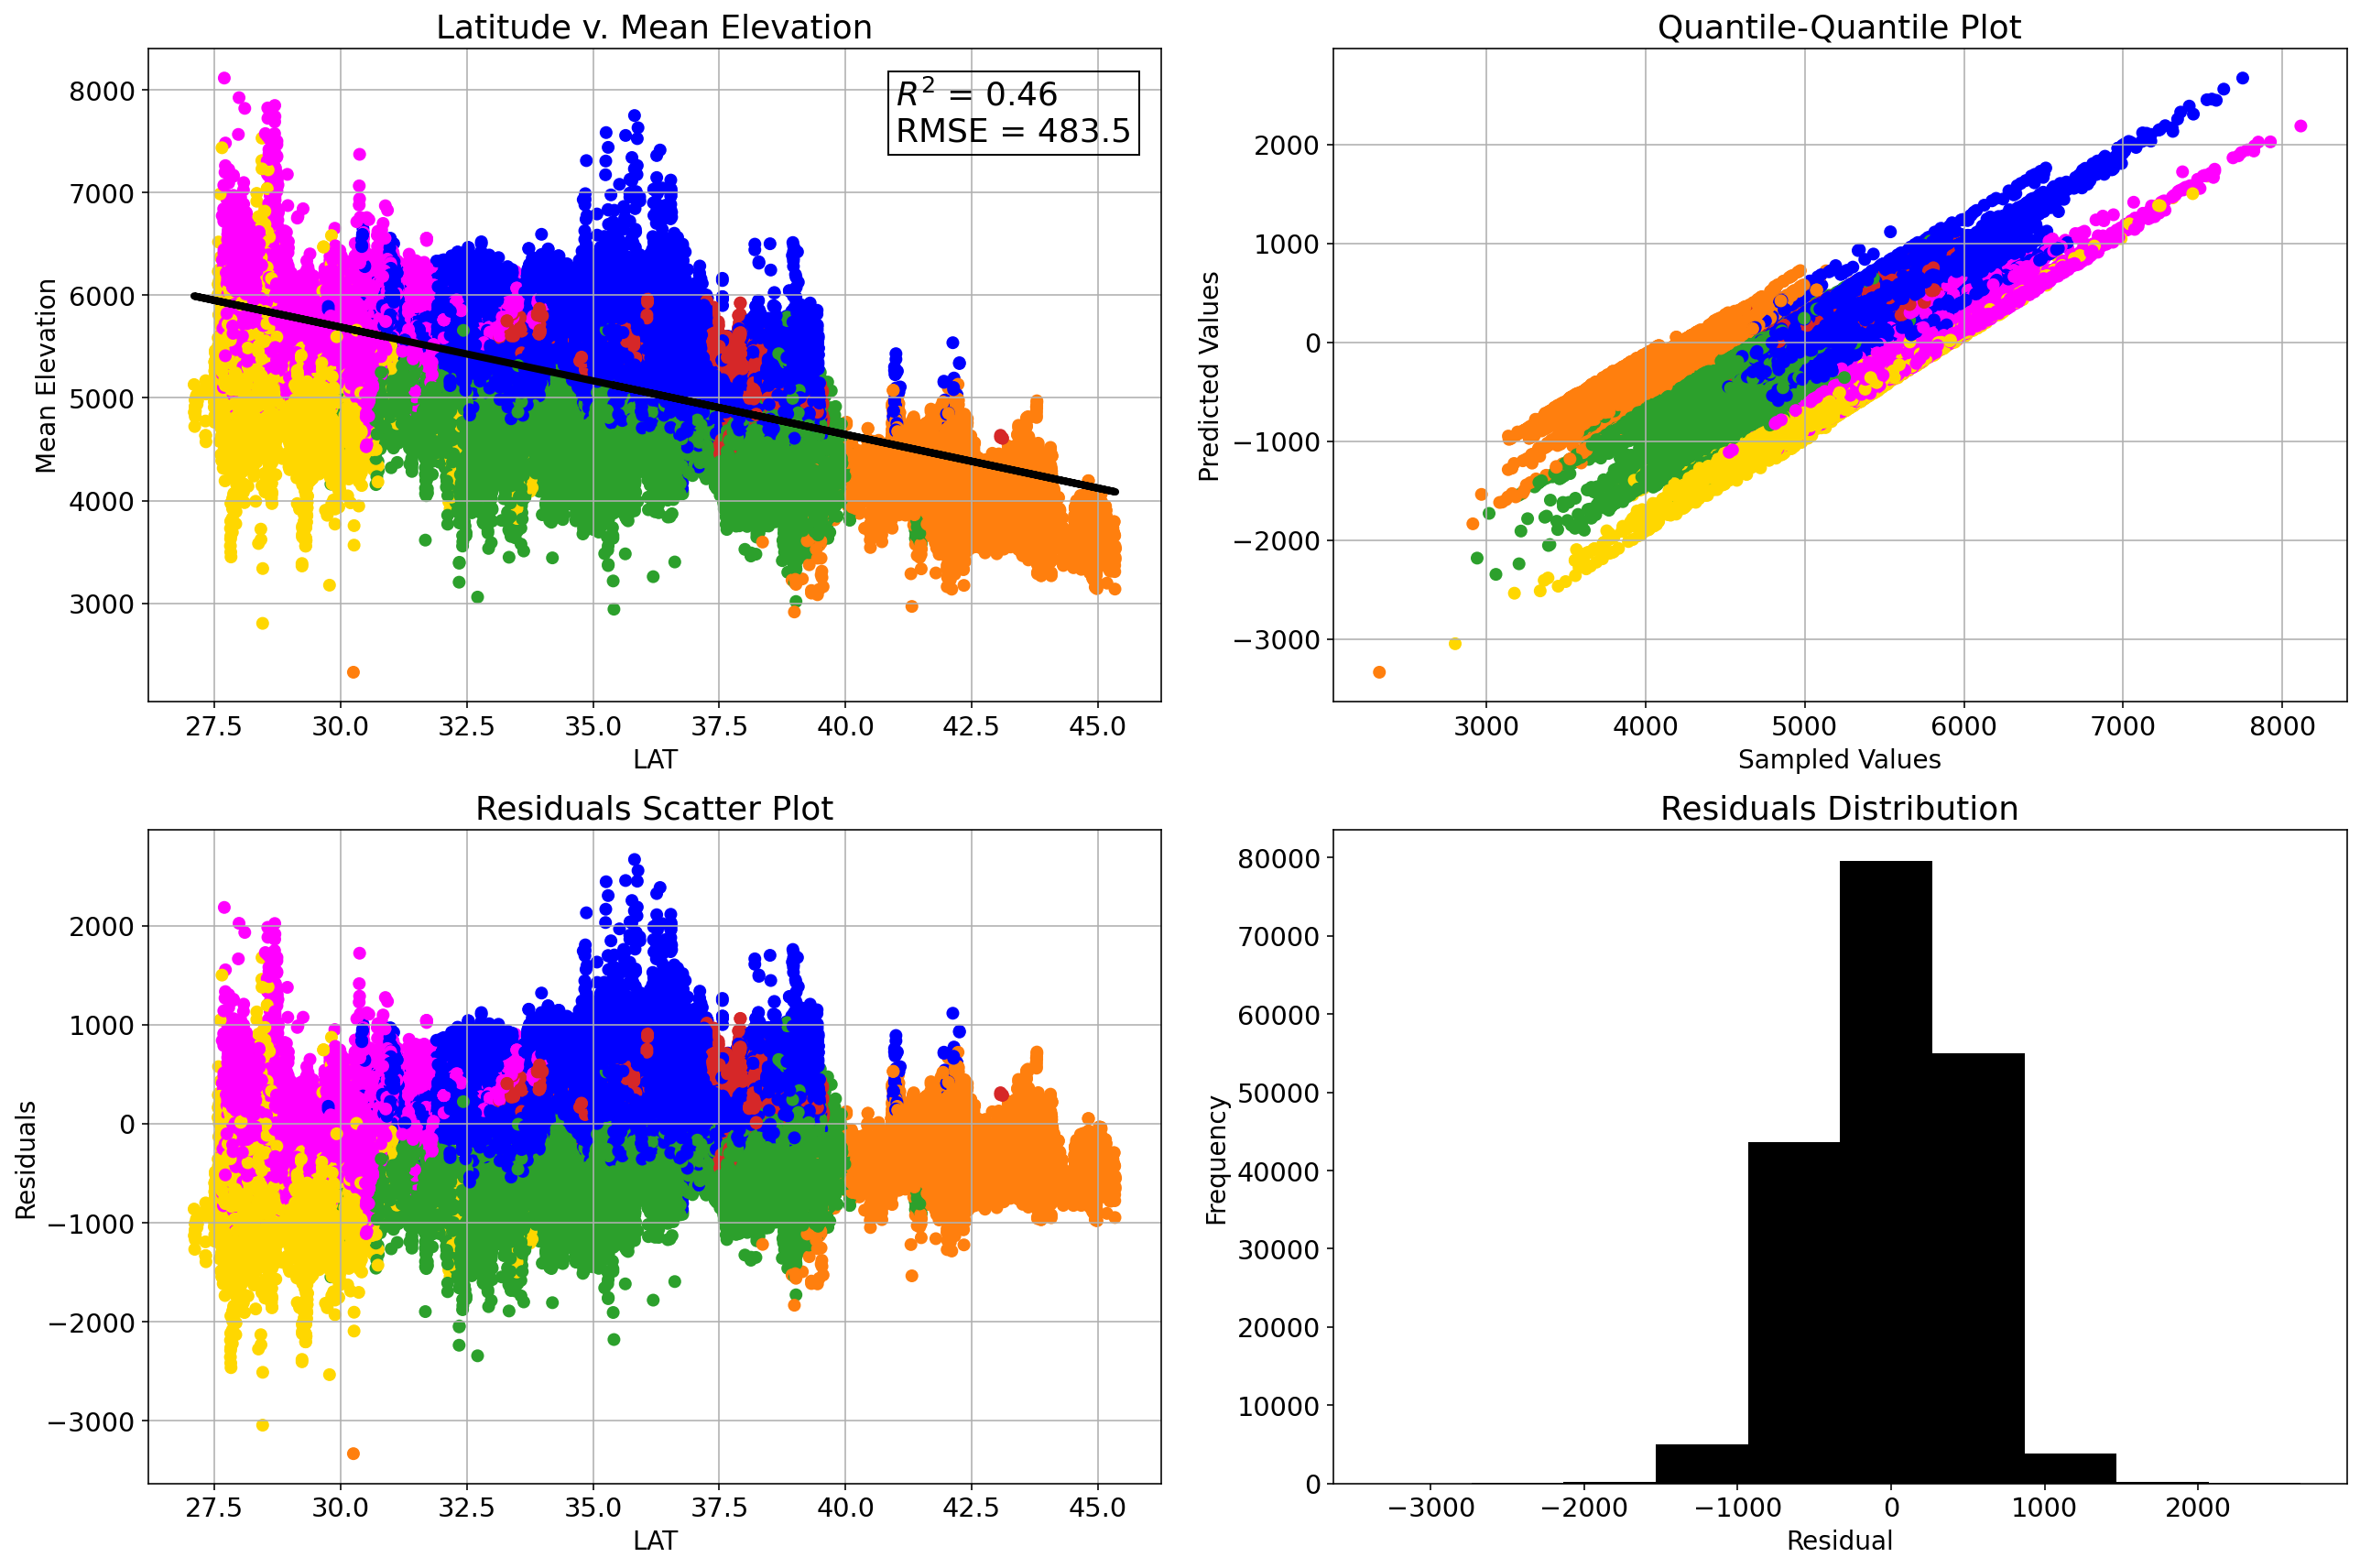

In [119]:

fig,axes = plt.subplots(2,2, figsize=(18,12))

colors = {0 : 'tab:orange', 1 : 'tab:green', 2 : 'magenta', 3 : 'tab:red', 4 : 'gold', 5 : 'b'}

# univariate regression
axes[0,0].scatter(x_total, y_total, c = df['Cluster_2'].map(colors), label = 'Basin Data')
axes[0,0].set_xlabel('LAT', fontsize = 14)
axes[0,0].set_ylabel('Mean Elevation', fontsize = 14)
axes[0,0].set_title('Latitude v. Mean Elevation', fontsize = 18)


axes[0,0].plot(x_total, y_pred_uni_total, color='k',linewidth=4,label='Regression')
txt = "$R^2$ = " + str(round(mod_uni.rsquared,2)) + '\nRMSE = ' + str(round(rmse_err_uni,2))
axes[0,0].text(41, 7500, txt, color='k',fontsize = 18, bbox=dict(facecolor='none', edgecolor='k'))
axes[0,0].grid()

# Residuals scatter plot
axes[0,1].scatter(y_total,y_total-y_pred_uni_total, c = df['Cluster_2'].map(colors))
axes[0,1].set_xlabel('Sampled Values', fontsize = 14)
axes[0,1].set_ylabel('Predicted Values', fontsize = 14)
axes[0,1].grid()
axes[0,1].set_title('Quantile-Quantile Plot', fontsize = 18)


axes[1,0].scatter(x_total,y_total-y_pred_uni_total, c = df['Cluster_2'].map(colors))
axes[1,0].set_xlabel('LAT', fontsize = 14)
axes[1,0].set_ylabel('Residuals', fontsize = 14)
axes[1,0].grid()
axes[1,0].set_title('Residuals Scatter Plot', fontsize = 18)

# residuals distribution
axes[1,1].hist(y_total-y_pred_uni_total, color = 'k')
axes[1,1].set_xlabel('Residual', fontsize = 14)
axes[1,1].set_ylabel('Frequency', fontsize = 14)
axes[1,1].set_title('Residuals Distribution', fontsize = 18)


plt.tight_layout()